In [1]:
#Importing libraries

#Data Handling
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#Data Visualization
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected = True)
import plotly.figure_factory as ff
import plotly.express as px

#Modelling
from sklearn import linear_model
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

#Os manage for files and paths
import os

#Others
from datetime import datetime
#Importing required libraries
import random
from IPython.display import Image
random_num=122

IMPORTAMOS ARCHIVO HISTORICO DE RANKING MUNDIAL

In [2]:
#ruta = os.getcwd()
ruta = '/home/morron87/Downloads/TFM/Qatar2022/2022_Final'
#print(ruta)

#ruta = os.getcwd()

#Historico de rankings FIFA
rankings = pd.read_csv(ruta + '/fifa_ranking-2022-10-06.csv')

#Selecciones WC y rendimiento actual
world_cup = pd.read_csv(ruta + '/World_Cup_2022_2.csv')

#Historico de partidos
matches = pd.read_csv(ruta + '/results_wWinnerPoints.csv')

#Ultimos 10 encuentros de las selecciones mundialistas y rendimiento
last10matches = pd.read_csv(ruta + '/last10matches.csv')

#Ultimos 10 encuentros de las selecciones rivales y rendimiento
last10matchesRivals = pd.read_csv(ruta + '/last10matchesRivals.csv')



In [3]:
rankings

,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation,rank_date
0,36,Hungary,HUN,36.00,0.00,0,UEFA,1992-12-31
1,53,Malawi,MWI,27.00,0.00,0,CAF,1992-12-31
2,52,Qatar,QAT,27.00,0.00,0,AFC,1992-12-31
3,51,Senegal,SEN,27.00,0.00,0,CAF,1992-12-31
4,50,El Salvador,SLV,28.00,0.00,0,CONCACAF,1992-12-31
...,...,...,...,...,...,...,...,...
63911,207,Sri Lanka,SRI,825.25,825.25,0,AFC,2022-10-06
63912,208,US Virgin Islands,VIR,823.97,823.97,0,CONCACAF,2022-10-06
63913,209,British Virgin Islands,VGB,809.32,809.32,0,CONCACAF,2022-10-06
63914,210,Anguilla,AIA,790.74,790.74,0,CONCACAF,2022-10-06


In [4]:
rankings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63916 entries, 0 to 63915
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rank             63916 non-null  int64  
 1   country_full     63916 non-null  object 
 2   country_abrv     63916 non-null  object 
 3   total_points     63916 non-null  float64
 4   previous_points  63916 non-null  float64
 5   rank_change      63916 non-null  int64  
 6   confederation    63916 non-null  object 
 7   rank_date        63916 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 3.9+ MB


In [5]:
rankings.describe()

,rank,total_points,previous_points,rank_change
count,63916.000000,63916.000000,63916.000000,63916.000000
mean,100.196821,442.404679,440.999013,0.004756
std,58.060019,409.091324,409.321338,5.659855
min,1.000000,1.000000,0.000000,-92.000000
25%,50.000000,88.000000,86.000000,-1.000000
50%,100.000000,347.000000,345.000000,0.000000
75%,149.000000,641.000000,640.000000,2.000000
max,211.000000,2172.000000,2187.000000,199.000000


In [6]:
rankings.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation,rank_date
0,36,Hungary,HUN,36.0,0.0,0,UEFA,1992-12-31
1,53,Malawi,MWI,27.0,0.0,0,CAF,1992-12-31
2,52,Qatar,QAT,27.0,0.0,0,AFC,1992-12-31
3,51,Senegal,SEN,27.0,0.0,0,CAF,1992-12-31
4,50,El Salvador,SLV,28.0,0.0,0,CONCACAF,1992-12-31


In [7]:
world_cup

,﻿#,Team,country_abrv,Group,Previous_appearances,Previous_titles,Previous_finals,Previous_semifinals,Current_FIFA_rank,PPG,...,Shots,ShotConv,Value,Age,First_match_against,Match_index,Second_match_against,Match_index.1,Third_match_against,Match_index.2
0,1,Ecuador,ECU,A,3,0,0,0,44,0.43,...,12.44,0.05,125.80,24.6,Qatar,1,Netherlands,17,Senegal,33
1,2,Qatar,QAT,A,0,0,0,0,50,0.53,...,10.78,0.15,18.33,26.8,Ecuador,1,Senegal,18,Netherlands,34
2,3,Netherlands,NED,A,10,0,3,5,8,0.80,...,12.80,0.18,472.75,26.8,Senegal,2,Ecuador,17,Qatar,34
3,4,Senegal,SEN,A,2,0,0,0,18,0.53,...,13.90,0.09,286.50,25.8,Netherlands,2,Qatar,18,Ecuador,33
4,5,England,ENG,B,15,1,1,3,5,0.50,...,14.30,0.17,1360.00,26.0,Wales,3,Iran,19,United States,35
5,6,Wales,WAL,B,1,0,0,0,19,0.30,...,11.00,0.10,130.85,24.6,England,3,United States,20,Iran,36
6,7,Iran,IRN,B,5,0,0,0,20,0.66,...,11.20,0.12,68.58,28.8,United States,4,England,19,Wales,36
7,8,United States,United States,B,10,0,0,1,16,0.53,...,13.20,0.13,204.40,24.2,Iran,4,Wales,20,England,35
8,9,Argentina,ARG,C,17,2,5,5,3,0.86,...,12.80,0.17,608.00,27.4,Saudi Arabia,5,Mexico,21,Poland,37
9,10,Saudi Arabia,KSA,C,5,0,0,0,51,0.33,...,8.60,0.05,23.10,26.9,Argentina,5,Poland,22,Mexico,38


In [8]:
world_cup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ﻿#                    32 non-null     int64  
 1   Team                  32 non-null     object 
 2   country_abrv          32 non-null     object 
 3   Group                 32 non-null     object 
 4   Previous_appearances  32 non-null     int64  
 5   Previous_titles       32 non-null     int64  
 6   Previous_finals       32 non-null     int64  
 7   Previous_semifinals   32 non-null     int64  
 8   Current_FIFA_rank     32 non-null     int64  
 9   PPG                   32 non-null     float64
 10  xGf                   32 non-null     float64
 11  xGa                   32 non-null     float64
 12  Gf                    32 non-null     float64
 13  Ga                    32 non-null     float64
 14  Cs                    32 non-null     float64
 15  Poss                  32 

In [9]:
world_cup.describe()

,﻿#,Previous_appearances,Previous_titles,Previous_finals,Previous_semifinals,Current_FIFA_rank,PPG,xGf,xGa,Gf,Ga,Cs,Poss,Shots,ShotConv,Value,Age,Match_index,Match_index.1,Match_index.2
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,16.500000,8.375000,0.531250,0.968750,1.875000,21.781250,0.593125,1.695937,1.174062,1.615625,0.865625,0.437500,0.547500,12.609375,0.128125,358.739687,26.493750,8.500000,24.500000,40.500000
std,9.380832,5.695216,1.217729,2.071066,3.210366,15.981308,0.147242,0.333185,0.240843,0.541866,0.331769,0.179156,0.072334,2.265581,0.034402,340.663854,1.014392,4.683533,4.683533,4.683533
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.300000,1.110000,0.790000,0.400000,0.200000,0.100000,0.380000,8.220000,0.050000,11.950000,24.200000,1.000000,17.000000,33.000000
25%,8.750000,5.000000,0.000000,0.000000,0.000000,9.750000,0.500000,1.447500,1.045000,1.300000,0.600000,0.300000,0.520000,11.150000,0.100000,129.587500,26.000000,4.750000,20.750000,36.750000
50%,16.500000,6.500000,0.000000,0.000000,0.000000,18.500000,0.580000,1.705000,1.125000,1.650000,0.900000,0.400000,0.560000,12.600000,0.135000,219.150000,26.800000,8.500000,24.500000,40.500000
75%,24.250000,13.000000,0.000000,1.000000,2.000000,30.250000,0.730000,1.862500,1.282500,1.925000,1.100000,0.600000,0.580000,13.597500,0.150000,493.062500,27.125000,12.250000,28.250000,44.250000
max,32.000000,21.000000,5.000000,8.000000,13.000000,61.000000,0.860000,2.400000,1.930000,2.800000,1.600000,0.800000,0.730000,18.100000,0.180000,1360.000000,28.800000,16.000000,32.000000,48.000000


In [10]:
matches

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Winner,Points
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,Draw,1
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,England,3
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Scotland,3
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,Draw,1
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Scotland,3
...,...,...,...,...,...,...,...,...,...,...,...
44054,2022-09-27,Albania,Iceland,1,1,UEFA Nations League,Tirana,Albania,False,Draw,1
44055,2022-09-27,Norway,Serbia,0,2,UEFA Nations League,Oslo,Norway,False,Serbia,3
44056,2022-09-27,Sweden,Slovenia,1,1,UEFA Nations League,Stockholm,Sweden,False,Draw,1
44057,2022-09-27,Kosovo,Cyprus,5,1,UEFA Nations League,Pristina,Kosovo,False,Kosovo,3


In [11]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44059 entries, 0 to 44058
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        44059 non-null  object
 1   home_team   44059 non-null  object
 2   away_team   44059 non-null  object
 3   home_score  44059 non-null  int64 
 4   away_score  44059 non-null  int64 
 5   tournament  44059 non-null  object
 6   city        44059 non-null  object
 7   country     44059 non-null  object
 8   neutral     44059 non-null  bool  
 9   Winner      44059 non-null  object
 10  Points      44059 non-null  int64 
dtypes: bool(1), int64(3), object(7)
memory usage: 3.4+ MB


In [12]:
matches.describe()

,home_score,away_score,Points
count,44059.000000,44059.000000,44059.000000
mean,1.740507,1.178306,2.539073
std,1.747525,1.394815,0.842269
min,0.000000,0.000000,1.000000
25%,1.000000,0.000000,3.000000
50%,1.000000,1.000000,3.000000
75%,2.000000,2.000000,3.000000
max,31.000000,21.000000,3.000000


In [13]:
last10matches

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Winner,Points
0,44588,Ecuador,Brazil,1,1,FIFA World Cup qualification,Quito,Ecuador,False,Draw,1
1,44649,Ecuador,Argentina,1,1,FIFA World Cup qualification,Guayaquil,Ecuador,False,Draw,1
2,44714,Ecuador,Nigeria,1,0,Friendly,Harrison,United States,True,Ecuador,3
3,44723,Ecuador,Cape Verde,1,0,Friendly,Fort Lauderdale,United States,True,Ecuador,3
4,44831,Ecuador,Japan,0,0,Kirin Challenge Cup,DÃ¼sseldorf,Germany,True,Draw,1
...,...,...,...,...,...,...,...,...,...,...,...
315,44649,Nigeria,Ghana,1,1,FIFA World Cup qualification,Abuja,Nigeria,False,Draw,1
316,44717,Central African Republic,Ghana,1,1,African Cup of Nations qualification,Luanda,Angola,True,Draw,1
317,44722,Japan,Ghana,4,1,Kirin Cup,Kobe,Japan,False,Japan,3
318,44726,Chile,Ghana,0,0,Kirin Cup,Suita,Japan,True,Draw,1


In [14]:
last10matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        320 non-null    int64 
 1   home_team   320 non-null    object
 2   away_team   320 non-null    object
 3   home_score  320 non-null    int64 
 4   away_score  320 non-null    int64 
 5   tournament  320 non-null    object
 6   city        320 non-null    object
 7   country     320 non-null    object
 8   neutral     320 non-null    bool  
 9   Winner      320 non-null    object
 10  Points      320 non-null    int64 
dtypes: bool(1), int64(4), object(6)
memory usage: 25.4+ KB


In [15]:
last10matches.describe()

,date,home_score,away_score,Points
count,320.000000,320.000000,320.000000,320.00000
mean,44681.562500,1.528125,0.975000,2.48750
std,100.146863,1.483184,1.184805,0.87449
min,44481.000000,0.000000,0.000000,1.00000
25%,44594.000000,0.000000,0.000000,1.00000
50%,44714.000000,1.000000,1.000000,3.00000
75%,44725.000000,2.000000,1.000000,3.00000
max,44831.000000,9.000000,10.000000,3.00000


In [16]:
last10matchesRivals

,Team,Current_FIFA_rank,PPG,xGf,xGa,Gf,Ga,Cs,Poss,Shots,ShotConv,Value,Age
0,Albania,66,0.23,1.47,1.28,0.6,1.4,0.3,0.50,12.00,0.05,86.05,26.2
1,Algeria,37,0.63,1.89,1.22,1.2,0.8,0.5,0.60,13.80,0.09,169.75,27.0
2,Andorra,151,0.47,1.33,1.29,0.9,1.2,0.4,0.41,11.80,0.08,1.65,27.7
3,Armenia,139,0.20,0.77,2.13,0.6,3.5,0.2,0.34,7.30,0.08,27.65,27.4
4,Austria,34,0.37,1.69,1.48,1.7,1.7,0.1,0.52,14.30,0.12,243.20,27.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,Ukraine,27,0.60,1.94,1.30,1.6,0.7,0.5,0.61,15.80,0.10,172.20,26.0
74,United Arab Emirates,70,0.23,1.01,1.54,0.5,1.6,0.2,0.51,7.80,0.06,19.60,26.7
75,Uzbekistan,77,0.70,2.29,0.87,2.4,1.0,0.4,0.60,15.88,0.17,25.65,25.4
76,Venezuela,57,0.40,1.45,1.35,1.2,1.3,0.3,0.50,11.30,0.11,41.25,26.3


In [17]:
last10matchesRivals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Team               78 non-null     object 
 1   Current_FIFA_rank  78 non-null     int64  
 2   PPG                78 non-null     float64
 3   xGf                78 non-null     float64
 4   xGa                78 non-null     float64
 5   Gf                 78 non-null     float64
 6   Ga                 78 non-null     float64
 7   Cs                 78 non-null     float64
 8   Poss               78 non-null     float64
 9   Shots              78 non-null     float64
 10  ShotConv           78 non-null     float64
 11  Value              78 non-null     float64
 12  Age                78 non-null     float64
dtypes: float64(11), int64(1), object(1)
memory usage: 8.0+ KB


In [18]:
last10matchesRivals.describe()

,Current_FIFA_rank,PPG,xGf,xGa,Gf,Ga,Cs,Poss,Shots,ShotConv,Value,Age
count,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000
mean,84.679487,0.433333,1.384487,1.466923,1.184487,1.331923,0.310513,0.481923,10.620128,0.107692,70.408462,26.162308
std,45.661514,0.165856,0.358194,0.294558,0.484665,0.572742,0.166233,0.062399,2.703595,0.032068,105.390892,1.242148
min,6.000000,0.000000,0.520000,0.850000,0.100000,0.400000,0.000000,0.290000,5.000000,0.020000,0.150000,22.800000
25%,49.750000,0.330000,1.160000,1.280000,0.900000,1.000000,0.200000,0.440000,8.625000,0.090000,8.042500,25.600000
50%,75.500000,0.470000,1.340000,1.445000,1.100000,1.200000,0.300000,0.490000,10.200000,0.110000,19.725000,26.200000
75%,108.500000,0.570000,1.567500,1.665000,1.400000,1.600000,0.400000,0.520000,12.267500,0.130000,91.175000,27.100000
max,212.000000,0.800000,2.530000,2.630000,2.900000,3.500000,0.600000,0.630000,19.000000,0.170000,579.000000,29.400000


EDA

Ajuste de nomenclaturas y obtenemos el ranking promedio historico por seleccion.

In [19]:
# recreate ranking by history ranking from first in the ranking to the last
#ranking = ranking[ranking['rank_date'] >= '1992-01-01']
rankings = rankings.replace({"IR Iran": "Iran",
                             "Turquia": "Turkey",
                             "Yugoslavia": "Serbia",
                             "Czechoslovakia" : "Czech Republic",
                             "Korea Republic": "South Korea",
                             "USA": "United States"})
ranking = rankings.groupby('country_full', as_index=False)['rank'].mean().round(0).sort_values(by='rank', ascending=True)
rankings['rank_prom'] = ranking['rank']
rankings['rank_prom'] = np.where(rankings['rank_prom'].isnull(), rankings['rank'], rankings['rank_prom'])
rankings['rank_prom'] = rankings['rank_prom'].astype(int)
print(rankings)

       rank            country_full country_abrv  total_points  \
0        36                 Hungary          HUN         36.00   
1        53                  Malawi          MWI         27.00   
2        52                   Qatar          QAT         27.00   
3        51                 Senegal          SEN         27.00   
4        50             El Salvador          SLV         28.00   
...     ...                     ...          ...           ...   
63911   207               Sri Lanka          SRI        825.25   
63912   208       US Virgin Islands          VIR        823.97   
63913   209  British Virgin Islands          VGB        809.32   
63914   210                Anguilla          AIA        790.74   
63915   211              San Marino          SMR        763.82   

       previous_points  rank_change confederation   rank_date  rank_prom  
0                 0.00            0          UEFA  1992-12-31        169  
1                 0.00            0           CAF  1992-1

In [20]:
#Evaluamos valores nulos para el df Rankings
rankings.isnull().sum()

rank               0
country_full       0
country_abrv       0
total_points       0
previous_points    0
rank_change        0
confederation      0
rank_date          0
rank_prom          0
dtype: int64

In [21]:
rankings.corr()

,rank,total_points,previous_points,rank_change,rank_prom
rank,1.000000,-0.516439,-0.511460,0.048710,0.996648
total_points,-0.516439,1.000000,0.996293,-0.022980,-0.518745
previous_points,-0.511460,0.996293,1.000000,0.020664,-0.513902
rank_change,0.048710,-0.022980,0.020664,1.000000,0.048420
rank_prom,0.996648,-0.518745,-0.513902,0.048420,1.000000


([<matplotlib.axis.XTick at 0x7f754fe14400>],
 [Text(1, 0, 'Cambio de posicion Ranking')])

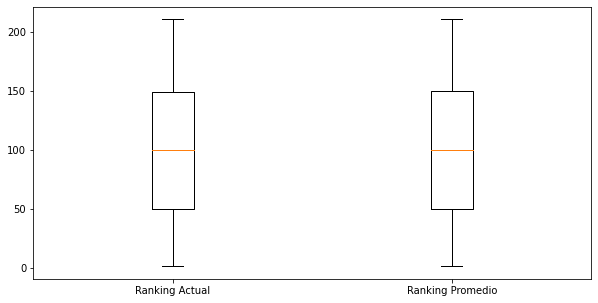

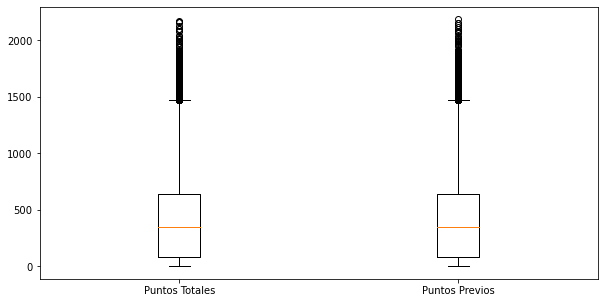

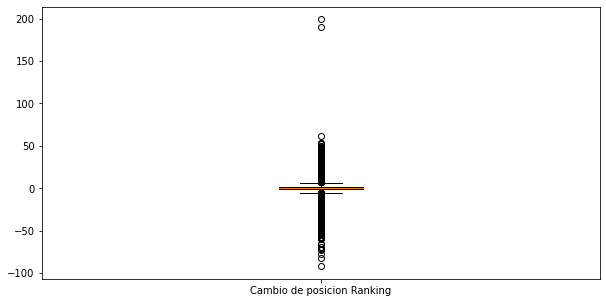

In [22]:
#Buscamos outliers para los valores numericos

#Evaluamos outliers para los valores de Ranking
fig = plt.figure(figsize =(10, 5))
plt.boxplot([rankings["rank"],rankings['rank_prom']])
plt.xticks([1,2], ["Ranking Actual","Ranking Promedio"])

#Evaluamos outliers para los valores de Puntos acumulados
fig = plt.figure(figsize =(10, 5))
plt.boxplot([rankings["total_points"],rankings['previous_points']])
plt.xticks([1,2], ["Puntos Totales", "Puntos Previos"])

#Evaluamos outliers para los cambios de posicion en el ranking
fig = plt.figure(figsize =(10, 5))
plt.boxplot([rankings['rank_change']])
plt.xticks([1], ["Cambio de posicion Ranking"])

In [23]:
#Evaluo los outliers mas destacados
rankings.loc[rankings['rank_change'].idxmax()]

#Decido no eliminar ninguno ya que son todos valores posibles dentro de cada columna. Ninguno esta fuera de lo previsto.

rank                       199
country_full       South Sudan
country_abrv               SSD
total_points              20.0
previous_points            0.0
rank_change                199
confederation              CAF
rank_date           2012-08-08
rank_prom                  199
Name: 42088, dtype: object

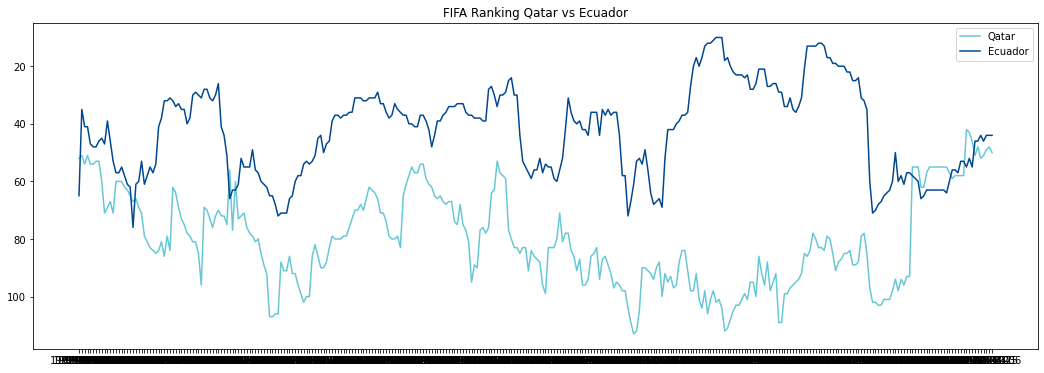

In [24]:
#Como se comportaron los equipos que abriran el proximo Mundial
fig, axes = plt.subplots(1,1,  figsize=(18, 6))
qat = rankings[rankings['country_full']=='Qatar']
ecu = rankings[rankings['country_full']=='Ecuador']
ax = sns.lineplot(data = qat, x = 'rank_date', y = 'rank', label = 'Qatar', color = "#66C8D5")
ax = sns.lineplot(data = ecu, x = 'rank_date', y = 'rank', label = 'Ecuador', color = '#00478E' )
ax.set_ylim(ax.get_ylim()[::-1])
ax.set(ylabel = '', xlabel = '', title = 'FIFA Ranking Qatar vs Ecuador')
plt.show()

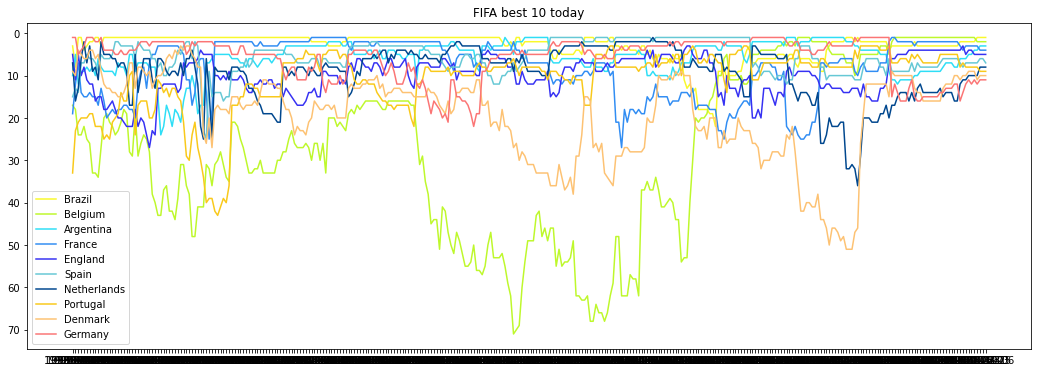

In [25]:
#Como se comportaron los equipos que abriran el proximo Mundial
fig, axes = plt.subplots(1,1,  figsize=(18, 6))
bra = rankings[rankings['country_full']=='Brazil']
bel = rankings[rankings['country_full']=='Belgium']
arg = rankings[rankings['country_full']=='Argentina']
fra = rankings[rankings['country_full']=='France']
eng = rankings[rankings['country_full']=='England']
#ita = rankings[rankings['country_full']=='Italy']
spa = rankings[rankings['country_full']=='Spain']
net = rankings[rankings['country_full']=='Netherlands']
por = rankings[rankings['country_full']=='Portugal']
den = rankings[rankings['country_full']=='Denmark']
ger = rankings[rankings['country_full']=='Germany']
ax = sns.lineplot(data = bra, x = 'rank_date', y = 'rank', label = 'Brazil', color = "#F9F92B")
ax = sns.lineplot(data = bel, x = 'rank_date', y = 'rank', label = 'Belgium', color = '#BEF82C' )
ax = sns.lineplot(data = arg, x = 'rank_date', y = 'rank', label = 'Argentina', color = "#2EDEF6")
ax = sns.lineplot(data = fra, x = 'rank_date', y = 'rank', label = 'France', color = '#318DF3' )
ax = sns.lineplot(data = eng, x = 'rank_date', y = 'rank', label = 'England', color = "#3631F3")
#ax = sns.lineplot(data = ita, x = 'rank_date', y = 'rank', label = 'Italy', color = '#A738EC' )
ax = sns.lineplot(data = spa, x = 'rank_date', y = 'rank', label = 'Spain', color = "#66C8D5")
ax = sns.lineplot(data = net, x = 'rank_date', y = 'rank', label = 'Netherlands', color = '#00478E' )
ax = sns.lineplot(data = por, x = 'rank_date', y = 'rank', label = 'Portugal', color = "#F9C91B")
ax = sns.lineplot(data = den, x = 'rank_date', y = 'rank', label = 'Denmark', color = '#FDC273' )
ax = sns.lineplot(data = ger, x = 'rank_date', y = 'rank', label = 'Germany', color = '#FB7575' )
ax.set_ylim(ax.get_ylim()[::-1])
ax.set(ylabel = '', xlabel = '', title = 'FIFA best 10 today')
plt.show()

IMPORTAMOS EL ARCHIVO CON LOS DATOS DE LAS SELECCIONES DEL MUNDIAL
Posee los datos mas representativos de la performance mas actual de cada seleccion

In [26]:
#world_cup = pd.read_csv(ruta + '/World_Cup_2022_2.csv')
#world_cup.head()

In [27]:

#world_cup = world_cup.loc[:, ['Team', 'Group', 'Current_FIFA_rank', 'First_match_against', 'Second_match_against', 'Third_match_against']]
world_cup = world_cup.loc[:,:]
#world_cup = world_cup.dropna(how='all')
world_cup = world_cup.replace({"IRAN": "Iran",
                               "IR Iran": "Iran",
                               "Costarica": "Costa Rica", 
                               "Porugal": "Portugal", 
                               "Columbia": "Colombia", 
                               "Korea" : "South Korea",
                               "Korea Republic": "South Korea",
                               "USA": "United States"})

#Imprimimos todo el df ya que conocemos que son 32 selecciones posibles, por ende 32 registros.
world_cup

,﻿#,Team,country_abrv,Group,Previous_appearances,Previous_titles,Previous_finals,Previous_semifinals,Current_FIFA_rank,PPG,...,Shots,ShotConv,Value,Age,First_match_against,Match_index,Second_match_against,Match_index.1,Third_match_against,Match_index.2
0,1,Ecuador,ECU,A,3,0,0,0,44,0.43,...,12.44,0.05,125.80,24.6,Qatar,1,Netherlands,17,Senegal,33
1,2,Qatar,QAT,A,0,0,0,0,50,0.53,...,10.78,0.15,18.33,26.8,Ecuador,1,Senegal,18,Netherlands,34
2,3,Netherlands,NED,A,10,0,3,5,8,0.80,...,12.80,0.18,472.75,26.8,Senegal,2,Ecuador,17,Qatar,34
3,4,Senegal,SEN,A,2,0,0,0,18,0.53,...,13.90,0.09,286.50,25.8,Netherlands,2,Qatar,18,Ecuador,33
4,5,England,ENG,B,15,1,1,3,5,0.50,...,14.30,0.17,1360.00,26.0,Wales,3,Iran,19,United States,35
5,6,Wales,WAL,B,1,0,0,0,19,0.30,...,11.00,0.10,130.85,24.6,England,3,United States,20,Iran,36
6,7,Iran,IRN,B,5,0,0,0,20,0.66,...,11.20,0.12,68.58,28.8,United States,4,England,19,Wales,36
7,8,United States,United States,B,10,0,0,1,16,0.53,...,13.20,0.13,204.40,24.2,Iran,4,Wales,20,England,35
8,9,Argentina,ARG,C,17,2,5,5,3,0.86,...,12.80,0.17,608.00,27.4,Saudi Arabia,5,Mexico,21,Poland,37
9,10,Saudi Arabia,KSA,C,5,0,0,0,51,0.33,...,8.60,0.05,23.10,26.9,Argentina,5,Poland,22,Mexico,38


In [28]:
#Evaluamos valores nulos para el df World_Cup
world_cup.isnull().sum()

﻿#                      0
Team                    0
country_abrv            0
Group                   0
Previous_appearances    0
Previous_titles         0
Previous_finals         0
Previous_semifinals     0
Current_FIFA_rank       0
PPG                     0
xGf                     0
xGa                     0
Gf                      0
Ga                      0
Cs                      0
Poss                    0
Shots                   0
ShotConv                0
Value                   0
Age                     0
First_match_against     0
Match_index             0
Second_match_against    0
Match_index.1           0
Third_match_against     0
Match_index.2           0
dtype: int64

([<matplotlib.axis.XTick at 0x7f754fc6b040>], [Text(1, 0, 'Valor promedio')])

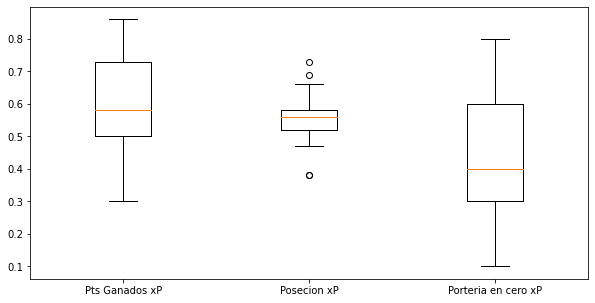

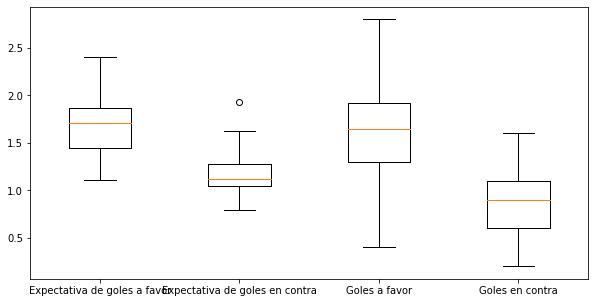

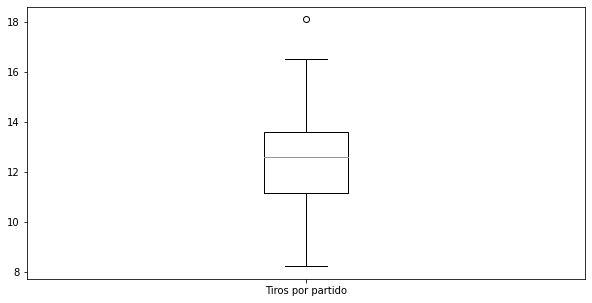

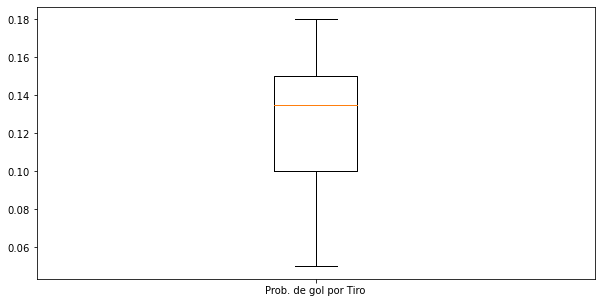

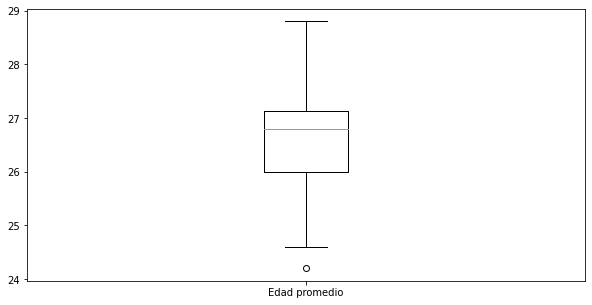

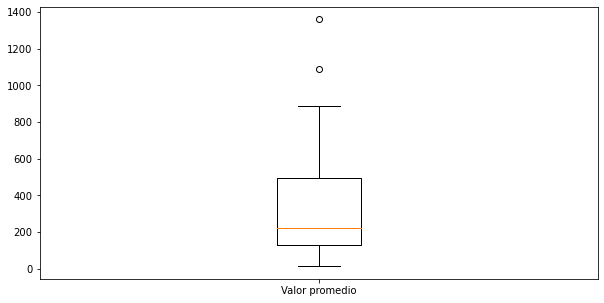

In [29]:
#Buscamos outliers para los valores numericos

#Evaluamos outliers para los valores de PPG, Posecion y Porteria en cero
fig = plt.figure(figsize =(10, 5))
plt.boxplot([world_cup["PPG"],world_cup['Poss'],world_cup['Cs']])
plt.xticks([1,2,3], ["Pts Ganados xP","Posecion xP","Porteria en cero xP"])

#Evaluamos outliers para los valores de xGf, xGa, Gf y Ga
fig = plt.figure(figsize =(10, 5))
plt.boxplot([world_cup["xGf"],world_cup['xGa'],world_cup["Gf"],world_cup['Ga']])
plt.xticks([1,2,3,4], ["Expectativa de goles a favor", "Expectativa de goles en contra","Goles a favor", "Goles en contra"])

#Evaluamos outliers para los tiros por partido
fig = plt.figure(figsize =(10, 5))
plt.boxplot([world_cup['Shots']])
plt.xticks([1], ["Tiros por partido"])

#Evaluamos outliers para la probabilidad de conversion a gol
fig = plt.figure(figsize =(10, 5))
plt.boxplot([world_cup['ShotConv']])
plt.xticks([1], ["Prob. de gol por Tiro"])

#Evaluamos outliers para los valores edad de los planteles
fig = plt.figure(figsize =(10, 5))
plt.boxplot([world_cup["Age"]])
plt.xticks([1], ["Edad promedio"])

#Evaluamos outliers para los valores valor de los planteles
fig = plt.figure(figsize =(10, 5))
plt.boxplot([world_cup["Value"]])
plt.xticks([1], ["Valor promedio"])

In [30]:
#Evaluo los outliers mas destacados
world_cup.loc[world_cup['Poss'].idxmax()]

#Decido no eliminar ninguno ya que son todos valores posibles dentro de cada columna. Ninguno esta fuera de lo previsto.
#En este caso España es bien conocido que suele tener una posecion alta por partido.

﻿#                              18
Team                         Spain
country_abrv                   ESP
Group                            E
Previous_appearances            15
Previous_titles                  1
Previous_finals                  1
Previous_semifinals              2
Current_FIFA_rank                7
PPG                           0.76
xGf                           1.67
xGa                           0.79
Gf                             1.7
Ga                             0.6
Cs                             0.6
Poss                          0.73
Shots                         10.8
ShotConv                      0.16
Value                        805.0
Age                           26.0
First_match_against     Costa Rica
Match_index                      9
Second_match_against         Japan
Match_index.1                   26
Third_match_against        Germany
Match_index.2                   42
Name: 17, dtype: object

In [31]:
world_cup.loc[world_cup['Poss'].idxmin()]

﻿#                                  6
Team                            Wales
country_abrv                      WAL
Group                               B
Previous_appearances                1
Previous_titles                     0
Previous_finals                     0
Previous_semifinals                 0
Current_FIFA_rank                  19
PPG                               0.3
xGf                              1.29
xGa                              1.62
Gf                                1.1
Ga                                1.4
Cs                                0.1
Poss                             0.38
Shots                            11.0
ShotConv                          0.1
Value                          130.85
Age                              24.6
First_match_against           England
Match_index                         3
Second_match_against    United States
Match_index.1                      20
Third_match_against              Iran
Match_index.2                      36
Name: 5, dty

In [32]:
world_cup[['Team','Poss']]

,Team,Poss
0,Ecuador,0.52
1,Qatar,0.47
2,Netherlands,0.57
3,Senegal,0.59
4,England,0.58
5,Wales,0.38
6,Iran,0.52
7,United States,0.56
8,Argentina,0.61
9,Saudi Arabia,0.54


In [33]:
world_cup.corr()

,﻿#,Previous_appearances,Previous_titles,Previous_finals,Previous_semifinals,Current_FIFA_rank,PPG,xGf,xGa,Gf,Ga,Cs,Poss,Shots,ShotConv,Value,Age,Match_index,Match_index.1,Match_index.2
﻿#,1.000000,0.145514,0.151078,0.040679,0.113540,-0.027004,0.214625,0.134015,-0.190966,0.160238,-0.030576,0.047985,0.130258,0.207788,0.076968,0.114590,0.154242,0.998533,0.992659,0.986785
Previous_appearances,0.145514,1.000000,0.747121,0.720292,0.763062,-0.684160,0.370925,0.554511,-0.495722,0.642983,-0.197825,0.207080,0.574751,0.519479,0.410379,0.710421,0.272345,0.158426,0.136657,0.154798
Previous_titles,0.151078,0.747121,1.000000,0.927724,0.925200,-0.443041,0.362856,0.600995,-0.307869,0.676325,-0.328615,0.245821,0.392772,0.603809,0.340259,0.643956,0.109844,0.161198,0.155542,0.166854
Previous_finals,0.040679,0.720292,0.927724,1.000000,0.960021,-0.465103,0.420286,0.594907,-0.306278,0.724806,-0.264518,0.151056,0.434424,0.573429,0.415688,0.590834,0.162663,0.054872,0.028268,0.051547
Previous_semifinals,0.113540,0.763062,0.925200,0.960021,1.000000,-0.523662,0.370725,0.613220,-0.290948,0.772569,-0.173768,0.075716,0.443129,0.597132,0.462221,0.679786,0.155269,0.124434,0.098689,0.111561
Current_FIFA_rank,-0.027004,-0.684160,-0.443041,-0.465103,-0.523662,1.000000,-0.501710,-0.461320,0.377798,-0.709590,0.107440,-0.066896,-0.393948,-0.431823,-0.602181,-0.690602,-0.297768,-0.024781,-0.010128,0.008835
PPG,0.214625,0.370925,0.362856,0.420286,0.370725,-0.501710,1.000000,0.322198,-0.322202,0.623218,-0.572230,0.551814,0.326044,0.274731,0.622747,0.283938,0.459294,0.222659,0.194125,0.193657
xGf,0.134015,0.554511,0.600995,0.594907,0.613220,-0.461320,0.322198,1.000000,-0.664041,0.626794,-0.236221,0.142060,0.663312,0.953371,0.120049,0.544259,-0.017448,0.139225,0.108011,0.098915
xGa,-0.190966,-0.495722,-0.307869,-0.306278,-0.290948,0.377798,-0.322202,-0.664041,1.000000,-0.381158,0.330423,-0.316892,-0.739318,-0.608148,-0.074972,-0.466963,-0.097072,-0.186599,-0.170871,-0.159146
Gf,0.160238,0.642983,0.676325,0.724806,0.772569,-0.709590,0.623218,0.626794,-0.381158,1.000000,-0.144054,0.100102,0.465203,0.604629,0.816681,0.749384,0.219672,0.169689,0.132828,0.131557


In [34]:
world_cup.loc[world_cup['xGa'].idxmax()]

﻿#                              17
Team                    Costa Rica
country_abrv                   CRC
Group                            E
Previous_appearances             5
Previous_titles                  0
Previous_finals                  0
Previous_semifinals              0
Current_FIFA_rank               31
PPG                           0.76
xGf                           1.11
xGa                           1.93
Gf                             1.3
Ga                             0.6
Cs                             0.6
Poss                          0.38
Shots                         8.22
ShotConv                      0.15
Value                        11.95
Age                           26.2
First_match_against          Spain
Match_index                      9
Second_match_against       Germany
Match_index.1                   25
Third_match_against          Japan
Match_index.2                   41
Name: 16, dtype: object

In [35]:
last10matches.loc[(last10matches['home_team']=='Costa Rica')]

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Winner,Points
69,44650,Costa Rica,United States,2,0,FIFA World Cup qualification,San JosÃ©,Costa Rica,False,Costa Rica,3
195,44644,Costa Rica,Canada,1,0,FIFA World Cup qualification,San JosÃ©,Costa Rica,False,Costa Rica,3
196,44650,Costa Rica,United States,2,0,FIFA World Cup qualification,San JosÃ©,Costa Rica,False,Costa Rica,3
197,44717,Costa Rica,Martinique,2,0,CONCACAF Nations League,San JosÃ©,Costa Rica,False,Costa Rica,3
198,44726,Costa Rica,New Zealand,1,0,FIFA World Cup qualification,Al Rayyan,Qatar,True,Costa Rica,3
199,44831,Costa Rica,Uzbekistan,2,1,Friendly,Suwon,South Korea,True,Costa Rica,3
232,44644,Costa Rica,Canada,1,0,FIFA World Cup qualification,San JosÃ©,Costa Rica,False,Costa Rica,3


In [36]:
last10matches.loc[(last10matches['away_team']=='Costa Rica')]

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Winner,Points
160,44591,Mexico,Costa Rica,0,0,FIFA World Cup qualification,Mexico City,Mexico,False,Draw,1
161,44594,Jamaica,Costa Rica,0,1,FIFA World Cup qualification,Kingston,Jamaica,False,Costa Rica,3
162,44647,El Salvador,Costa Rica,1,2,FIFA World Cup qualification,San Salvador,El Salvador,False,Costa Rica,3
163,44714,Panama,Costa Rica,2,0,CONCACAF Nations League,Panama City,Panama,False,Panama,3
164,44827,South Korea,Costa Rica,2,2,Friendly,Goyang,South Korea,False,Draw,1
289,44827,South Korea,Costa Rica,2,2,Friendly,Goyang,South Korea,False,Draw,1


In [37]:
#Evaluo los outliers mas destacados
world_cup.loc[world_cup['Shots'].idxmax()]

#Decido no eliminar ninguno ya que son todos valores posibles dentro de cada columna. Ninguno esta fuera de lo previsto.
#En este caso Brasil es una de las seleccion mas poderosas qeu generan muchas situaciones de gol

﻿#                               25
Team                         Brazil
country_abrv                    BRA
Group                             G
Previous_appearances             21
Previous_titles                   5
Previous_finals                   7
Previous_semifinals              11
Current_FIFA_rank                 1
PPG                            0.86
xGf                            2.29
xGa                            0.97
Gf                              2.8
Ga                              0.3
Cs                              0.7
Poss                           0.59
Shots                          18.1
ShotConv                       0.15
Value                        1090.0
Age                            27.2
First_match_against     Switzerland
Match_index                      13
Second_match_against       Cameroon
Match_index.1                    29
Third_match_against          Serbia
Match_index.2                    45
Name: 24, dtype: object

In [38]:
world_cup.loc[world_cup['Value'].idxmax()]

﻿#                                  5
Team                          England
country_abrv                      ENG
Group                               B
Previous_appearances               15
Previous_titles                     1
Previous_finals                     1
Previous_semifinals                 3
Current_FIFA_rank                   5
PPG                               0.5
xGf                              1.97
xGa                              1.08
Gf                                2.4
Ga                                1.1
Cs                                0.4
Poss                             0.58
Shots                            14.3
ShotConv                         0.17
Value                          1360.0
Age                              26.0
First_match_against             Wales
Match_index                         3
Second_match_against             Iran
Match_index.1                      19
Third_match_against     United States
Match_index.2                      35
Name: 4, dty

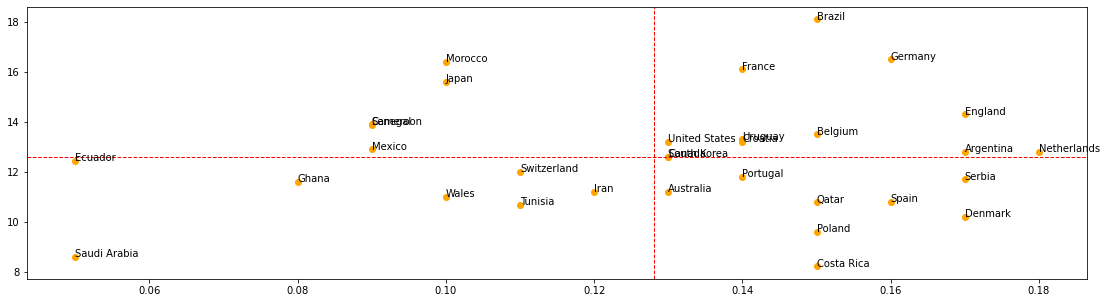

In [39]:
#Analizamos situaciones generadas vs conversion por partido
y = world_cup['Shots']
z = world_cup['ShotConv']
n = world_cup['Team']
x=len(world_cup)

fig, ax = plt.subplots(figsize =(19, 5))
ax.scatter(z, y,color='orange')

for i in range(x):
    ax.annotate(n[i], (z[i], y[i]), xytext=(z[i], y[i]))

#ax.set(xlim=(-3, 3), ylim=(-3, 3))

# Plot your initial diagonal line based on the starting
# xlims and ylims.


ax.axvline(x=0.128125, color='red', linestyle='--', linewidth=1, label='Mean')
ax.axhline(y=np.nanmean(y), color='red', linestyle='--', linewidth=1, label='Mean')

#diag_line, = ax.plot(0.128125, 12.60, ls="--")

def on_change(axes):
    # When this function is called it checks the current
    # values of xlim and ylim and modifies diag_line
    # accordingly.
    x_lims = ax.get_xlim()
    y_lims = ax.get_ylim()
    diag_line.set_data(x_lims, y_lims)

# Connect two callbacks to your axis instance.
# These will call the function "on_change" whenever
# xlim or ylim is changed.
ax.callbacks.connect('xlim_changed', on_change)
ax.callbacks.connect('ylim_changed', on_change)


plt.show()

#Vemos que Dinamarca, generando pocas situaciones, convierte mucho mas que Francia, que necesita generar muchas mas situaciones de gol para convertir.
#Ambas selecciones comparten grupo, lo que sera un gran duelo para ver.

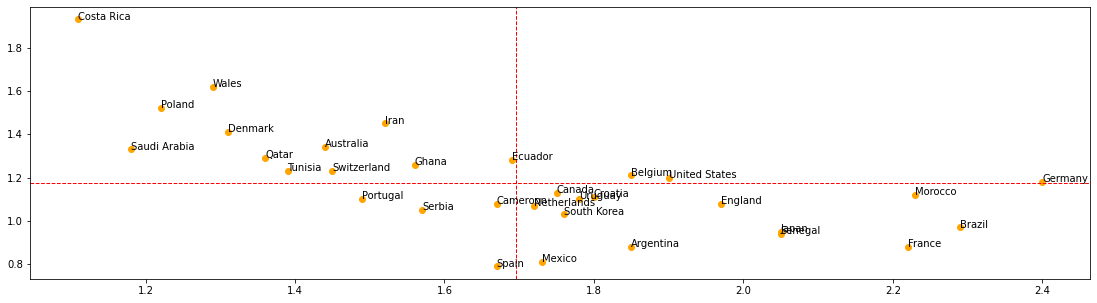

In [40]:
#Analizamos expectativas de goles a favor y en contra
y = world_cup['xGa']
z = world_cup['xGf']
n = world_cup['Team']
x=len(world_cup)

fig, ax = plt.subplots(figsize =(19, 5))
ax.scatter(z, y,color='orange')

for i in range(x):
    ax.annotate(n[i], (z[i], y[i]), xytext=(z[i], y[i]))

#ax.set(xlim=(-3, 3), ylim=(-3, 3))

# Plot your initial diagonal line based on the starting
# xlims and ylims.

ax.axvline(x=1.695937 , color='red', linestyle='--', linewidth=1, label='Mean')
ax.axhline(y=np.nanmean(y), color='red', linestyle='--', linewidth=1, label='Mean')

#diag_line, = ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--")

def on_change(axes):
    # When this function is called it checks the current
    # values of xlim and ylim and modifies diag_line
    # accordingly.
    x_lims = ax.get_xlim()
    y_lims = ax.get_ylim()
    diag_line.set_data(x_lims, y_lims)

# Connect two callbacks to your axis instance.
# These will call the function "on_change" whenever
# xlim or ylim is changed.
ax.callbacks.connect('xlim_changed', on_change)
ax.callbacks.connect('ylim_changed', on_change)


plt.show()

#Costa Rica se espera que reciba mas goles en contra que lo que pueda hacer propio
#Alemania, se espera que haga 2,4 goles por partido y reciba 1,2
#España, se espera que haga 1,7 goles, casi 2 goles contra 0,8, de las expectativas mas bajas Junto a Mexico y Argentina

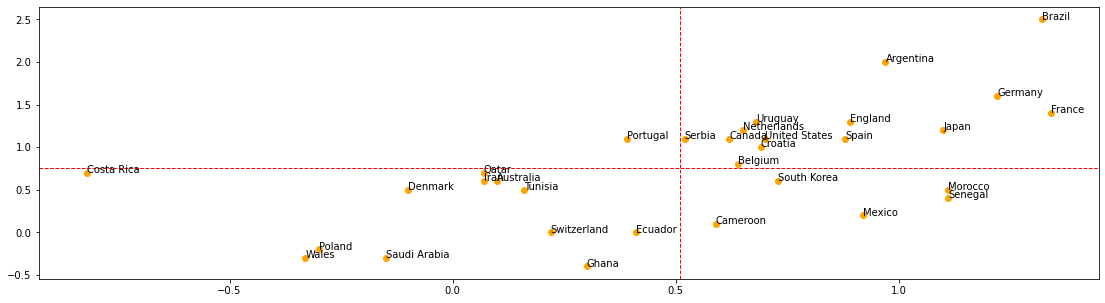

In [41]:
#Analizamos diferencia de expectativa de goles contra lo que han hecho
y = world_cup['Gf']-world_cup['Ga']
z = world_cup['xGf']-world_cup['xGa']
n = world_cup['Team']
x=len(world_cup)

fig, ax = plt.subplots(figsize =(19, 5))
ax.scatter(z, y,color='orange')

for i in range(x):
    ax.annotate(n[i], (z[i], y[i]), xytext=(z[i], y[i]))

#ax.set(xlim=(-3, 3), ylim=(-3, 3))

# Plot your initial diagonal line based on the starting
# xlims and ylims.

ax.axvline(x=0.51 , color='red', linestyle='--', linewidth=1, label='Mean')
ax.axhline(y=np.nanmean(y), color='red', linestyle='--', linewidth=1, label='Mean')

#diag_line, = ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--")

def on_change(axes):
    # When this function is called it checks the current
    # values of xlim and ylim and modifies diag_line
    # accordingly.
    x_lims = ax.get_xlim()
    y_lims = ax.get_ylim()
    diag_line.set_data(x_lims, y_lims)

# Connect two callbacks to your axis instance.
# These will call the function "on_change" whenever
# xlim or ylim is changed.
ax.callbacks.connect('xlim_changed', on_change)
ax.callbacks.connect('ylim_changed', on_change)


plt.show()

#Argentina tiene como expectativa positiva, hacer un gol mas que los que reciba. En la realidad, ha hecho 2 goles mas que lo que recibio
#Brasil es otro de los equipos, que se espera que haga mas goles que los que reciba y en la realidad, lo ha hecho mucho mejor todavia, realizando 2,5 goles mas que los que recibe
#Por otro lado tenemos a gales, el cual su expectativa es negativa, tiende a recibir mas goles que los que hace y en la realidad ha sucedido lo mismo. La tendra dificil en el mundial


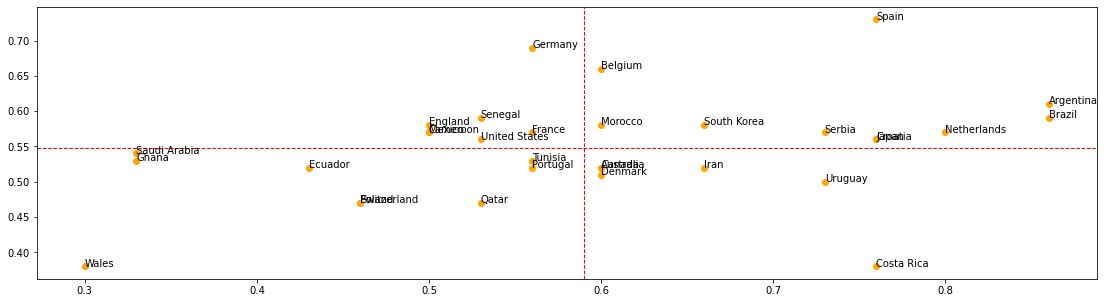

In [42]:
#Analizamos la probabilidad de ganar un partido con la posecion promedio que tienen los equipos
y = world_cup['Poss']
z = world_cup['PPG']
n = world_cup['Team']
x=len(world_cup)

fig, ax = plt.subplots(figsize =(19, 5))
ax.scatter(z, y,color='orange')

for i in range(x):
    ax.annotate(n[i], (z[i], y[i]), xytext=(z[i], y[i]))

#ax.set(xlim=(-3, 3), ylim=(-3, 3))

# Plot your initial diagonal line based on the starting
# xlims and ylims.

ax.axvline(x=0.59 , color='red', linestyle='--', linewidth=1, label='Mean')
ax.axhline(y=np.nanmean(y), color='red', linestyle='--', linewidth=1, label='Mean')

#diag_line, = ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--")

def on_change(axes):
    # When this function is called it checks the current
    # values of xlim and ylim and modifies diag_line
    # accordingly.
    x_lims = ax.get_xlim()
    y_lims = ax.get_ylim()
    diag_line.set_data(x_lims, y_lims)

# Connect two callbacks to your axis instance.
# These will call the function "on_change" whenever
# xlim or ylim is changed.
ax.callbacks.connect('xlim_changed', on_change)
ax.callbacks.connect('ylim_changed', on_change)


plt.show()

#Argentina y Brasil igualados en la obtencion de puntos por partido, tienen las mismas chances de conseguir un buen resultado con poseciones similares
#España si bien la posecion mas alta, no consigue tanto como Brasil o Argentina. Igual esta bien posicionada
#Alemania, tiene un caso particular, mucha posecion, pero no consigue tanto como deberia. Lo mismo Belgica
#Llamativo el caso de Costa Rica, entrega la pelota completamente, pero consigue muchos resultados positivos a pesar de esto.


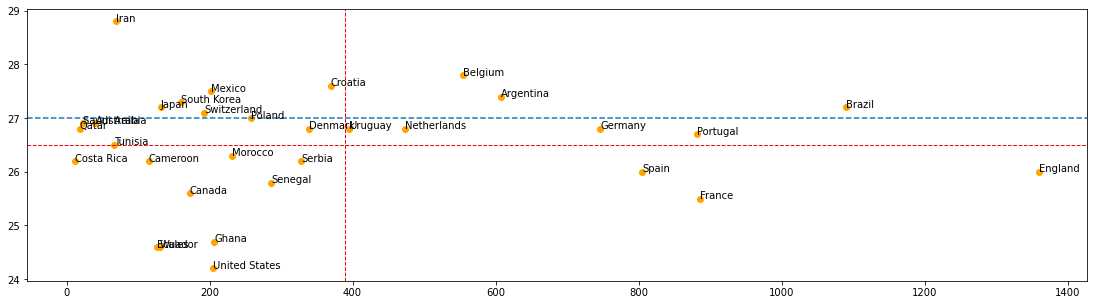

In [43]:
#Analizamos la probabilidad de ganar un partido con la posecion promedio que tienen los equipos
y = world_cup['Age']
z = world_cup['Value']
n = world_cup['Team']
x=len(world_cup)

fig, ax = plt.subplots(figsize =(19, 5))
ax.scatter(z, y,color='orange')

for i in range(x):
    ax.annotate(n[i], (z[i], y[i]), xytext=(z[i], y[i]))

# Plot your initial diagonal line based on the starting
# xlims and ylims.
#diag_line, = ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--")
ax.axvline(x=390 , color='red', linestyle='--', linewidth=1, label='Mean')
ax.axhline(y=np.nanmean(y), color='red', linestyle='--', linewidth=1, label='Mean')

plt.axhline(y=27, xmin=0, xmax=1400, ls='--')
def on_change(axes):
    # When this function is called it checks the current
    # values of xlim and ylim and modifies diag_line
    # accordingly.
    x_lims = ax.get_xlim()
    y_lims = ax.get_ylim()
    diag_line.set_data(x_lims, y_lims)

# Connect two callbacks to your axis instance.
# These will call the function "on_change" whenever
# xlim or ylim is changed.
ax.callbacks.connect('xlim_changed', on_change)
ax.callbacks.connect('ylim_changed', on_change)


plt.show()

#Se dice que un jugador esta "maduro" en torno a los 27 años. Bien aqui el promedio de edad de los planteles esta en su mayoria por la edad
#de 27 años. Iran parece ser el equipo con "vejez" y Estados Unidos, Ghana, Ecuador y Gales los mas "jovenes"


IMPORTAMOS EL ARCHIVO CON LOS DATOS DE LAS SELECCIONES EN PARTIDOS DESDE 1872

In [44]:
#Genero un df para futuro analisis de ultimo comportamiento.
world_cup10matches=world_cup[['Team','Current_FIFA_rank','PPG','xGf','xGa','Gf','Ga','Cs','Poss','Shots','ShotConv','Value','Age']].copy()
world_cup10matches

,Team,Current_FIFA_rank,PPG,xGf,xGa,Gf,Ga,Cs,Poss,Shots,ShotConv,Value,Age
0,Ecuador,44,0.43,1.69,1.28,0.7,0.7,0.5,0.52,12.44,0.05,125.80,24.6
1,Qatar,50,0.53,1.36,1.29,1.6,0.9,0.4,0.47,10.78,0.15,18.33,26.8
2,Netherlands,8,0.80,1.72,1.07,2.3,1.1,0.3,0.57,12.80,0.18,472.75,26.8
3,Senegal,18,0.53,2.05,0.94,1.3,0.9,0.4,0.59,13.90,0.09,286.50,25.8
4,England,5,0.50,1.97,1.08,2.4,1.1,0.4,0.58,14.30,0.17,1360.00,26.0
5,Wales,19,0.30,1.29,1.62,1.1,1.4,0.1,0.38,11.00,0.10,130.85,24.6
6,Iran,20,0.66,1.52,1.45,1.3,0.7,0.5,0.52,11.20,0.12,68.58,28.8
7,United States,16,0.53,1.90,1.20,1.7,0.6,0.6,0.56,13.20,0.13,204.40,24.2
8,Argentina,3,0.86,1.85,0.88,2.2,0.2,0.8,0.61,12.80,0.17,608.00,27.4
9,Saudi Arabia,51,0.33,1.18,1.33,0.4,0.7,0.4,0.54,8.60,0.05,23.10,26.9


In [45]:
world_cup10matches=pd.concat([world_cup10matches,last10matchesRivals])
world_cup10matches

,Team,Current_FIFA_rank,PPG,xGf,xGa,Gf,Ga,Cs,Poss,Shots,ShotConv,Value,Age
0,Ecuador,44,0.43,1.69,1.28,0.7,0.7,0.5,0.52,12.44,0.05,125.80,24.6
1,Qatar,50,0.53,1.36,1.29,1.6,0.9,0.4,0.47,10.78,0.15,18.33,26.8
2,Netherlands,8,0.80,1.72,1.07,2.3,1.1,0.3,0.57,12.80,0.18,472.75,26.8
3,Senegal,18,0.53,2.05,0.94,1.3,0.9,0.4,0.59,13.90,0.09,286.50,25.8
4,England,5,0.50,1.97,1.08,2.4,1.1,0.4,0.58,14.30,0.17,1360.00,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,Ukraine,27,0.60,1.94,1.30,1.6,0.7,0.5,0.61,15.80,0.10,172.20,26.0
74,United Arab Emirates,70,0.23,1.01,1.54,0.5,1.6,0.2,0.51,7.80,0.06,19.60,26.7
75,Uzbekistan,77,0.70,2.29,0.87,2.4,1.0,0.4,0.60,15.88,0.17,25.65,25.4
76,Venezuela,57,0.40,1.45,1.35,1.2,1.3,0.3,0.50,11.30,0.11,41.25,26.3


In [46]:
#Finding outmissing values

matches.isnull().sum()
#No any missing values
#We are good to go

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
Winner        0
Points        0
dtype: int64

In [47]:
#See what are the Countries in the dataset

tournament=matches.tournament.unique()
print(f"There are {len(tournament)} Tournaments in the tournament Column\n")
print(f"Tournament-{tournament}")

There are 139 Tournaments in the tournament Column

Tournament-['Friendly' 'British Championship' 'Copa Lipton' 'Copa Newton'
 'Copa Premio Honor Argentino' 'Copa Premio Honor Uruguayo' 'Copa Roca'
 'Copa AmÃ©rica' 'Copa Chevallier Boutell' 'Nordic Championship'
 'International Cup' 'Baltic Cup' 'Balkan Cup' 'FIFA World Cup'
 'Copa Rio Branco' 'FIFA World Cup qualification' 'Bolivarian Games'
 'CCCF Championship' 'NAFU Championship' 'Copa Oswaldo Cruz'
 'Pan American Championship' 'Copa del PacÃ\xadfico'
 "Copa Bernardo O'Higgins" 'AFC Asian Cup qualification' 'Atlantic Cup'
 'AFC Asian Cup' 'African Cup of Nations' 'Copa Paz del Chaco'
 'Merdeka Tournament' 'UEFA Euro qualification' 'UEFA Euro'
 'Windward Islands Tournament' 'African Cup of Nations qualification'
 'Vietnam Independence Cup' 'Copa Carlos Dittborn' 'Phillip Seaga Cup'
 'CONCACAF Championship' 'Copa Juan Pinto DurÃ¡n' 'Arab Cup'
 'South Pacific Games' 'CONCACAF Championship qualification'
 'Copa Artigas' 'GaNEFo' "King's

In [48]:
matches = matches.replace({"Copa AmÃ©rica": "Copa America",
                           "Copa del PacÃ\xadfico": "Copa del Pacifico",
                           "Copa Juan Pinto DurÃ¡n": "Copa Juan Pinto Duran",
                           "Copa RamÃ³n Castilla": "Copa Ramon Castilla",
                           "Copa FÃ©lix Bogado": "Copa Felix Bogado",
                           "AmÃ\xadlcar Cabral Cup": " Amilcar Cabral Cup",
                           "CONMEBOLâ€“UEFA Cup of Champions": "CONMEBOL-UEFA Cup of Champions",
                           "SuperclÃ¡sico de las AmÃ©ricas": "Superclasico de las Americas",
                           "Copa AmÃ©rica qualification": "Copa America qualification"})

In [49]:
#See what are the HomeTeams in the dataset

home_team=matches.home_team.unique()
print(f"There are {len(home_team)} Home Teams in the home_team Column\n")
print(f"Home Team-{home_team}")

There are 311 Home Teams in the home_team Column

Home Team-['Scotland' 'England' 'Wales' 'Northern Ireland' 'United States' 'Uruguay'
 'Austria' 'Hungary' 'Argentina' 'Belgium' 'France' 'Netherlands'
 'Czechoslovakia' 'Switzerland' 'Sweden' 'Germany' 'Italy' 'Chile'
 'Norway' 'Finland' 'Luxembourg' 'Russia' 'Denmark' 'Catalonia'
 'Basque Country' 'Brazil' 'Japan' 'Paraguay' 'Canada' 'Estonia'
 'Costa Rica' 'Guatemala' 'Spain' 'Brittany' 'Poland' 'Yugoslavia'
 'New Zealand' 'Romania' 'Latvia' 'Galicia' 'Portugal' 'Andalusia'
 'China PR' 'Australia' 'Lithuania' 'Turkey' 'Central Spain' 'Mexico'
 'Aruba' 'Egypt' 'Haiti' 'Philippines' 'Bulgaria' 'Jamaica' 'Kenya'
 'Bolivia' 'Peru' 'Honduras' 'Guyana' 'Uganda' 'Belarus' 'El Salvador'
 'Barbados' 'Republic of Ireland' 'Trinidad and Tobago' 'Greece'
 'CuraÃ§ao' 'Dominica' 'Silesia' 'Guadeloupe' 'Israel' 'Suriname'
 'French Guiana' 'Cuba' 'Colombia' 'Ecuador' 'Saint Kitts and Nevis'
 'Panama' 'Slovakia' 'Manchukuo' 'Croatia' 'Nicaragua' 'Afgh

In [50]:
#See what are the Away Teams in the dataset

away_team=matches.away_team.unique()
print(f"There are {len(away_team)} Away Teams in the home_team Column\n")
print(f"Away Team-{away_team}")

There are 306 Away Teams in the home_team Column

Away Team-['England' 'Scotland' 'Wales' 'Northern Ireland' 'Canada' 'Argentina'
 'Hungary' 'Czechoslovakia' 'Austria' 'Uruguay' 'France' 'Switzerland'
 'Netherlands' 'Belgium' 'Germany' 'Norway' 'Sweden' 'Italy' 'Chile'
 'Catalonia' 'Finland' 'Russia' 'Luxembourg' 'Denmark' 'Brazil'
 'Basque Country' 'United States' 'Philippines' 'Estonia' 'Provence'
 'El Salvador' 'Costa Rica' 'Paraguay' 'Yugoslavia' 'Poland' 'Portugal'
 'Spain' 'Romania' 'Australia' 'Central Spain' 'Mexico' 'Galicia'
 'Brittany' 'Asturias' 'China PR' 'New Zealand' 'Latvia' 'Guatemala'
 'CuraÃ§ao' 'Bulgaria' 'Lithuania' 'Turkey' 'Egypt' 'South Africa'
 'Jamaica' 'Japan' 'Republic of Ireland' 'Uganda' 'Bolivia' 'Haiti'
 'Trinidad and Tobago' 'Kenya' 'Ukraine' 'Honduras' 'Nicaragua' 'Greece'
 'Guyana' 'Peru' 'Aruba' 'Martinique' 'Barbados' 'Cuba' 'Israel'
 'Indonesia' 'Suriname' 'Saint Lucia' 'Ecuador' 'Venezuela' 'Grenada'
 'India' 'Panama' 'Slovakia' 'Croatia' 'Lebanon

In [51]:
matches = matches.replace({"German DR": "Germany"})

([<matplotlib.axis.XTick at 0x7f754dc14a60>,
 [Text(1, 0, 'Home Score'), Text(2, 0, 'Away Score')])

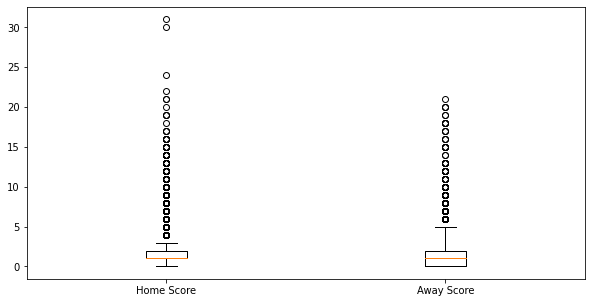

In [52]:
#finding outliers in the numerical data columns

fig = plt.figure(figsize =(10, 5))
plt.boxplot([matches["home_score"],matches["away_score"]])
plt.xticks([1,2], ["Home Score", "Away Score"])

#La mayoria de los partidos tienen resultados de pocos goles, pero encontramos muchas excepciones con partidos de mas de 10, 20 y 30 goles.


In [53]:
matches.loc[matches['home_score'].idxmax()]

date                            2001-04-11
home_team                        Australia
away_team                   American Samoa
home_score                              31
away_score                               0
tournament    FIFA World Cup qualification
city                         Coffs Harbour
country                          Australia
neutral                              False
Winner                           Australia
Points                                   3
Name: 24124, dtype: object

In [54]:
matches.loc[matches['away_score'].idxmax()]

date                 2005-03-11
home_team                  Guam
away_team           North Korea
home_score                    0
away_score                   21
tournament    EAFF Championship
city                     Taipei
country                  Taiwan
neutral                    True
Winner              North Korea
Points                        3
Name: 27701, dtype: object

In [55]:
#Genero una nueva columna "Win_Statues" para almacenar si el Local Gano,Perdio o Empato
conditions  = [matches["home_score"] ==matches["away_score"], matches["home_score"] > matches["away_score"] , matches["home_score"] < matches["away_score"]]
choices     = [ "Draw", 'Win', 'Lost' ]
matches["Win_Statues"] = np.select(conditions, choices)
matches.head(5)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Winner,Points,Win_Statues
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,Draw,1,Draw
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,England,3,Win
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Scotland,3,Win
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,Draw,1,Draw
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Scotland,3,Win


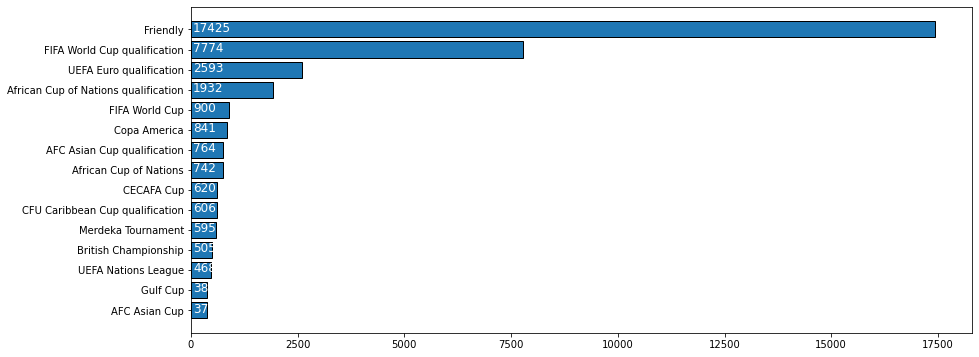

In [56]:
#Analizamos cantidad de partidos jugados historicamente por tipo de torneo
rank_bound = 15
ax = matches.tournament.value_counts()[:rank_bound].sort_values()
value = ax.values
label = ax.index

plt.figure(figsize=(14,6))
plt.barh(y=label, width=value, edgecolor="k")
for i in range(rank_bound):
    plt.text(x=50,y=i-0.1,s=value[i],color="w",fontsize=12)
plt.show()

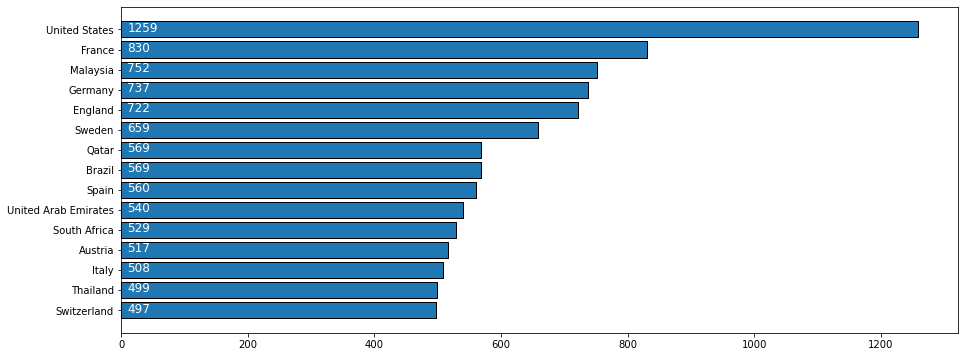

In [57]:
#Que seleccion disputo mas partidos, independientemente del torneo
rank_bound = 15
ax = matches.country.value_counts()[:rank_bound].sort_values()
value = ax.values
label = ax.index

plt.figure(figsize=(15,6))
plt.barh(y=label, width=value, edgecolor="k")
for i in range(rank_bound):
    plt.text(x=10,y=i-0.1,s=value[i],color="w",fontsize=12)
plt.show()

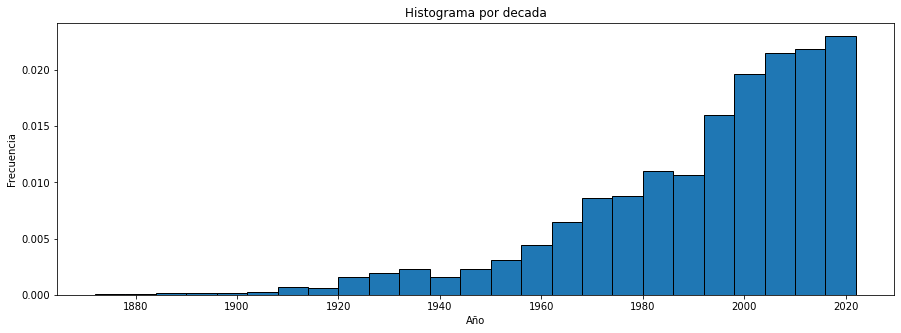

In [58]:
#Cantidad de partidos disputados por decada
years = []
for date in matches.date:
    years.append(int(str(date)[0:4]))
plt.figure(figsize=(15,5))
plt.hist(years, density=True, bins=25, edgecolor="k")
plt.title("Histograma por decada")
plt.ylabel("Frecuencia")
plt.xlabel("Año")
plt.show()

#La mayoria se empezo a jugar pasado 1960

In [59]:
#Como les fue a las selecciones que son locales en los diferentes tipos de partidos
#Eliminamos los amistosos por su poco valor jerarquico comparado a torneos oficiales

df_noFriendlys = matches.loc[matches["tournament"] != "Friendly"]
data_home=df_noFriendlys.loc[df_noFriendlys["home_team"]==df_noFriendlys["country"]]

tournament_df=pd.crosstab(data_home["tournament"], data_home["Win_Statues"],margins=True)
tournament_df=tournament_df.sort_values("All",ascending=False).head(20)
tournament_df.style.bar(color="orange",subset=["Win","Draw","Lost","All"])

Win_Statues,Draw,Lost,Win,All
tournament,,,,
All,3852,4580,9364,17796
FIFA World Cup qualification,1523,1874,3704,7101
UEFA Euro qualification,496,800,1227,2523
African Cup of Nations qualification,447,356,1045,1848
AFC Asian Cup qualification,86,124,288,498
British Championship,95,137,220,452
UEFA Nations League,109,144,198,451
CFU Caribbean Cup qualification,83,99,213,395
Copa America,65,50,177,292


Text(0.5, 1.0, 'Home Team Winning Status')

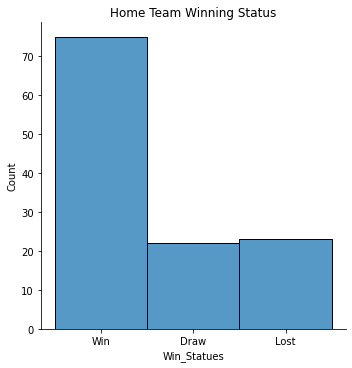

In [60]:
#Rendimiento de las selecciones locales en copas del mundo.
sns.displot(data_home.loc[data_home['tournament']=="FIFA World Cup"], x="Win_Statues")
plt.title("Home Team Winning Status")

In [61]:
#Defino un % de victoria por ser local que tal vez usemos para asignarselo a Qatar como fortaleza
home_WinWC=data_home.loc[data_home['tournament']=="FIFA World Cup"]
home_WinWCRatio=round(len(home_WinWC.loc[home_WinWC["Win_Statues"]=="Win"])/len(home_WinWC),2)
home_LostWCRatio=round(len(home_WinWC.loc[home_WinWC["Win_Statues"]=="Lost"])/len(home_WinWC),2)
home_DrawWCRatio=round(len(home_WinWC.loc[home_WinWC["Win_Statues"]=="Draw"])/len(home_WinWC),2)
print(f"home_WinWCRatio: {home_WinWCRatio}")
print(f"home_LostWCRatio: {home_LostWCRatio}")
print(f"home_DrawWCRatio: {home_DrawWCRatio}")

home_WinWCRatio: 0.62
home_LostWCRatio: 0.19
home_DrawWCRatio: 0.18


In [62]:
#Tomamos como base los partidos disputados en Copas del Mundo
df_WC = matches.loc[matches["tournament"] == "FIFA World Cup"]

#Generamos un df para los equipos en condicion de Local y calculamos sus triunfos, derrotas y empates
teams_home_statues=pd.crosstab(df_WC["home_team"], df_WC["Win_Statues"],margins=True, margins_name="Total")
teams_home_statues=teams_home_statues.add_suffix('_home')
teams_home_statues.sort_values("home_team",ascending=True)
teams_home_statues["home_team"]=teams_home_statues.index

#Generamos un df para los equipos en condicion de Visitante y calculamos sus triunfos, derrotas y empates
teams_away_statues=pd.crosstab(df_WC["away_team"], df_WC["Win_Statues"],margins=True, margins_name="Total")
teams_away_statues=teams_away_statues.add_suffix('_away')
teams_away_statues.sort_values("away_team",ascending=True)
teams_away_statues["away_team"]=teams_away_statues.index

#Unimos todo en un solo df, sumando valores y calculando su % de victorias
teams_statues = pd.concat([teams_home_statues, teams_away_statues],axis="columns")
teams_statues=teams_statues.fillna(0.0)
teams_statues["Lost"]=teams_statues["Draw_home"]+teams_statues["Draw_away"]
teams_statues["Draw"]=teams_statues["Lost_home"]+teams_statues["Lost_away"]
teams_statues["Win"]=teams_statues["Win_home"]+teams_statues["Win_away"]
teams_statues["Total"]=teams_statues["Total_home"]+teams_statues["Total_away"]
teams_statues["team_win_probability"]=teams_statues["Win"]/(teams_statues["Total"])

#Limpiamos lo que no necesitamos y nos quedmoas con los equipos que participan en el proximo mundial.
teams_statues=teams_statues.join(world_cup.set_index('Team'), on='away_team')
teams_statues=teams_statues.loc[teams_statues["Match_index"].notnull()]
teams_statues=teams_statues[["Win","Draw","Lost","Total","team_win_probability"]]

#Graficamos
teams_statues=teams_statues.sort_values("team_win_probability",ascending=False)
teams_statues.style.bar(color="green",subset="team_win_probability")

#We can see teams has more than 50% wining probability while playing in the home grounds 

,Win,Draw,Lost,Total,team_win_probability
Ecuador,7.000000,2.000000,1.000000,10.000000,0.700000
Canada,2.000000,1.000000,0.000000,3.000000,0.666667
Argentina,49.000000,17.000000,15.000000,81.000000,0.604938
Portugal,17.000000,7.000000,6.000000,30.000000,0.566667
Australia,9.000000,3.000000,4.000000,16.000000,0.562500
Brazil,59.000000,32.000000,18.000000,109.000000,0.541284
Tunisia,8.000000,3.000000,4.000000,15.000000,0.533333
Germany,61.000000,32.000000,22.000000,115.000000,0.530435
Poland,18.000000,11.000000,5.000000,34.000000,0.529412
Belgium,25.000000,14.000000,9.000000,48.000000,0.520833


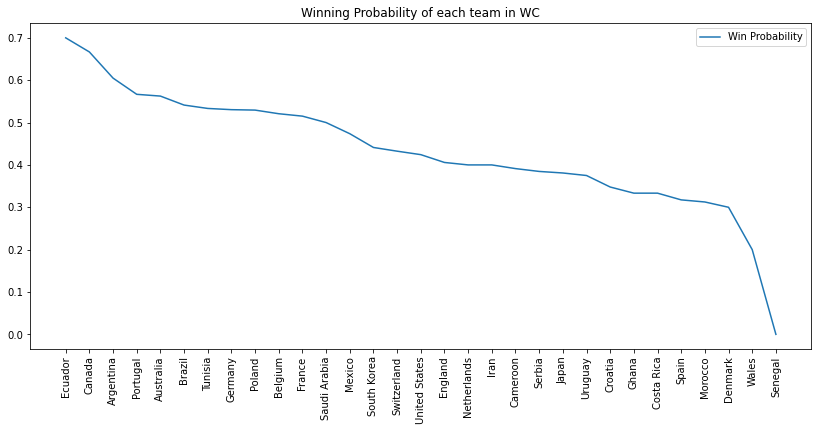

In [63]:
#Making a plot to identify wining possibilities in both home and away conditions

win_prob={teams_statues.iloc[i,:].name:[teams_statues.iloc[i,4]] for i in range(teams_statues.shape[0])}
for i in range(teams_statues.shape[0]):
    try:
        win_prob[teams_statues.iloc[i,:].name].append(teams_statues.iloc[i,4]) 
    except:
        pass
country_names=win_prob.keys()
lst_home=[i[0] for i in win_prob.values()]

lst_away=[]
for i in win_prob.values():
    if len(i)==2:
        lst_away.append(i[1])
    else:
        lst_away.append(0)

plt.figure(figsize=(14,6))
plt.plot(country_names,lst_home, label = "Win Probability")
plt.xticks(rotation = 90)
plt.title("Winning Probability of each team in WC")
plt.legend()
plt.show()

In [64]:
#Home Conditions
#Que equipos fueron los mejores desempeñandose como "local" en rangos de 15 años

range_years=max(years)-min(years)
no_0f_terms=10
term_size=int(range_years/no_0f_terms)
for i in range(no_0f_terms+1):
    start=years.index(term_size*i+min(years))
    end=years.index(min(term_size*(i+1)+min(years),2022))
    term=matches.iloc[start:end]
    
    if(start!=43319):
        best_teams=pd.crosstab(term["home_team"], term["Win_Statues"],margins=True, margins_name="Total")
    
        ##Lets take teams which plays atleast 20 games
        best_teams["team_win_probability"]=best_teams["Win"]/(best_teams["Total"])
        best_teams=best_teams.sort_values("team_win_probability",ascending=False)
        best_teams=best_teams.loc[best_teams["Total"]>15]
        print(f"\nBest 2 team in the term: {term_size*i+min(years)}-{min(term_size*(i+1)+min(years),2022)} ")
        if (best_teams.shape[0]>2):
            print(best_teams.iloc[0:2].to_markdown())
        else:
            print(f"No Enough data to find the best team in the term: {term_size*i+min(years)}-{min(term_size*(i+1)+min(years),2022)} ")


Best 2 team in the term: 1872-1887 
No Enough data to find the best team in the term: 1872-1887 

Best 2 team in the term: 1887-1902 
| home_team   |   Draw |   Lost |   Win |   Total |   team_win_probability |
|:------------|-------:|-------:|------:|--------:|-----------------------:|
| England     |      2 |      3 |    20 |      25 |               0.8      |
| Scotland    |      2 |      3 |    18 |      23 |               0.782609 |

Best 2 team in the term: 1902-1917 
| home_team   |   Draw |   Lost |   Win |   Total |   team_win_probability |
|:------------|-------:|-------:|------:|--------:|-----------------------:|
| Netherlands |      2 |      3 |    11 |      16 |               0.6875   |
| England     |      5 |      2 |    12 |      19 |               0.631579 |

Best 2 team in the term: 1917-1932 
| home_team      |   Draw |   Lost |   Win |   Total |   team_win_probability |
|:---------------|-------:|-------:|------:|--------:|-----------------------:|
| Scotland     

In [65]:
#Away Conditions
##Que equipos fueron los mejores desempeñandose como "visitante" en rangos de 15 años

range_years=max(years)-min(years)
no_0f_terms=10
term_size=int(range_years/no_0f_terms)
for i in range(no_0f_terms+1):
    start=years.index(term_size*i+min(years))
    end=years.index(min(term_size*(i+1)+min(years),2022))
    term=matches.iloc[start:end]
    if (start!=43319):
        best_teams=pd.crosstab(term["away_team"], term["Win_Statues"],margins=True, margins_name="Total")
    
        ##Lets take teams which plays atleast 200 games
        best_teams["team_win_probability"]=best_teams["Lost"]/(best_teams["Total"])
        best_teams=best_teams.sort_values("team_win_probability",ascending=False)
        best_teams=best_teams.loc[best_teams["Total"]>15]
        print(f"\nBest 2 team in the term: {term_size*i+min(years)}-{min(term_size*(i+1)+min(years),2022)} ")
        if (best_teams.shape[0]>2):
            print(best_teams.iloc[0:2].to_markdown())
        else:
            print(f"No Enough data to find the best team in the term: {term_size*i+min(years)}-{min(term_size*(i+1)+min(years),2022)} ")


Best 2 team in the term: 1872-1887 
No Enough data to find the best team in the term: 1872-1887 

Best 2 team in the term: 1887-1902 
| away_team   |   Draw |   Lost |   Win |   Total |   team_win_probability |
|:------------|-------:|-------:|------:|--------:|-----------------------:|
| England     |      4 |     14 |     2 |      20 |               0.7      |
| Scotland    |      6 |     13 |     4 |      23 |               0.565217 |

Best 2 team in the term: 1902-1917 
| away_team   |   Draw |   Lost |   Win |   Total |   team_win_probability |
|:------------|-------:|-------:|------:|--------:|-----------------------:|
| England     |      5 |     18 |     4 |      27 |               0.666667 |
| Belgium     |      1 |      8 |     9 |      18 |               0.444444 |

Best 2 team in the term: 1917-1932 
| away_team   |   Draw |   Lost |   Win |   Total |   team_win_probability |
|:------------|-------:|-------:|------:|--------:|-----------------------:|
| Spain       |      

In [66]:
#Vamos a analizar un poco el sistema ELO para determinar quienes son los mejores equipos a lo largo de la historia.
games=matches
games['Winner'] = np.where((games['home_score'] > games['away_score']), games['home_team'], np.where((games['home_score'] < games['away_score']), games['away_team'], 'Draw'))
games['Loser'] = np.where((games['home_score'] > games['away_score']), games['away_team'], np.where((games['home_score'] < games['away_score']), games['home_team'], 'Draw'))

games['Year'] = games['date'].apply(lambda date : int(date.split('-')[0]))
games['Month'] = games['date'].apply(lambda date : int(date.split('-')[1]))
games['Day'] = games['date'].apply(lambda date : int(date.split('-')[2]))
games['Date'] = games['date'].apply(lambda date : pd.to_datetime(date))
all_teams = games['home_team'].append(games['away_team']).unique()
elo_df = pd.DataFrame(0, index = all_teams, columns= range(1870,2022))

major_comp = ['UEFA Euro', 'African Cup of Nations', 'Copa América', 'AFC Asian Cup', 'UEFA Nations League',
              'Confederations Cup', 'African Nations Championship', 'CONCACAF Championship', 'Gold Cup',
             'Pan American Championship', 'Pacific Games', 'Oceania Nations Cup']
qualif = ['Copa América qualification', 'AFC Asian Cup qualification', 'UEFA Euro qualification', 
          'African Cup of Nations qualification', 'FIFA World Cup qualification', 'CONCACAF Championship qualification',
          'Gold Cup qualification', 'Oceania Nations Cup qualification']

def def_k(comp):
    if comp == 'FIFA World Cup':
        return 60
    elif comp in major_comp:
        return 50
    elif comp in qualif:
        return 40
    elif comp == 'Friendly':
        return 20
    else:
        return 30

def def_g(team_goals, enemy_goals):
    if team_goals - enemy_goals <= 1:
        return 1
    elif team_goals - enemy_goals == 2:
        return 3/2
    elif team_goals - enemy_goals == 3:
        return 7/4
    else:
        return 7/4 + (team_goals - enemy_goals - 3)/8

def def_w(team, winner):
    if team == winner:
        return 1
    elif winner == 'Draw':
        return 1/2
    else:
        return 0
    
def def_dr(team_elo, enemy_elo, neutral):
    if neutral:
        return team_elo - enemy_elo
    else: 
        return team_elo - enemy_elo + 100

for year in range(1871, 2022):
    elo_df[year] = elo_df[year - 1]
    for game in games[games['Year'] == year].values:
        game_series = pd.Series(game, index = games.columns)
        elo_df.loc[game_series['home_team'], year] += def_k(game_series['tournament']) * def_g(game_series['home_score'], game_series['away_score']) * (def_w(game_series['home_team'], game_series['Winner']) - 1/(10 **(- def_dr(elo_df.loc[game_series['home_team']][year], elo_df.loc[game_series['away_team']][year], game_series['neutral']) / 400) + 1))
        elo_df.loc[game_series['away_team'], year] += def_k(game_series['tournament']) * def_g(game_series['away_score'], game_series['home_score']) * (def_w(game_series['away_team'], game_series['Winner']) - 1/(10 **(- def_dr(elo_df.loc[game_series['away_team']][year], elo_df.loc[game_series['home_team']][year], True) / 400) + 1))

/tmp/ipykernel_23733/3993199286.py:10: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



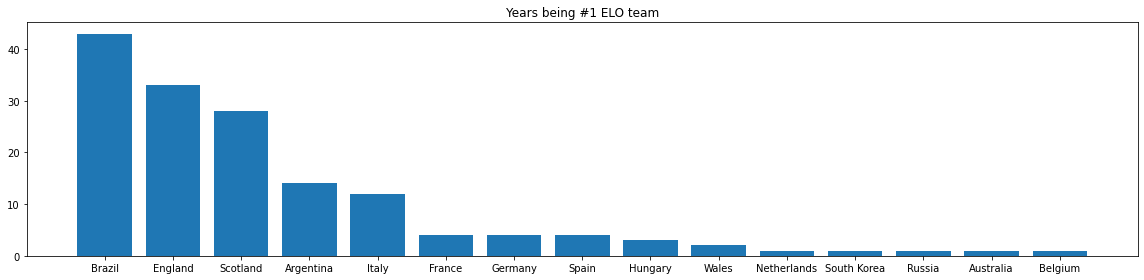

In [67]:
plt.figure(figsize=(16,4))
plt.title('Years being #1 ELO team')
plt.bar(x = elo_df.idxmax().value_counts().index, height = elo_df.idxmax().value_counts().values)
plt.tight_layout()

In [68]:
all_teams = games['Loser'].unique() #Only teams which have lost a game
enemys_df = pd.DataFrame('', index = all_teams[1:], columns = ['Worst enemy'])
for country in all_teams[1:]: #We don't take 'Draw'
    enemys_df.loc[country]['Worst enemy'] = games[games['Loser'] == country]['Winner'].value_counts().index[0]
enemys_df['Worst enemy'].value_counts().head(10)

Padania                9
Germany                7
Tahiti                 7
South Korea            7
Nigeria                6
Malaysia               6
Trinidad and Tobago    6
England                5
Northern Cyprus        5
Jersey                 5
Name: Worst enemy, dtype: int64

In [69]:
#enemys_df.loc[best_elos.index]

In [70]:
#We exclude teams that haven't win a single game
win_streaks = pd.DataFrame('', index = games['Winner'].unique()[1:], columns = ['Longest streak', 'Start of the streak', 'End of the streak', 'End of streak opponent'])
for team in games['Winner'].unique()[1:]:
    team_games = games[(games['home_team'] == team) | (games['away_team'] == team)]
    team_games['won'] = (team_games['Winner'] == team).apply(int)
    team_games['series'] = (team_games['won'] != team_games['won'].shift()).cumsum()
    team_games['streak'] = team_games.groupby(['won', 'series']).cumcount() + 1
    team_games.loc[team_games['won'] == 0, 'streak'] = 0
    #Find longest streak
    win_streaks.loc[team, 'Longest streak'] = team_games['streak'].max()
    last_win = team_games.loc[team_games['streak'].idxmax()]
    win_streaks.loc[team, 'Start of the streak'] = str(team_games.loc[(team_games['series'] == last_win['series']) & (team_games['streak'] == 1),'Date'].values[0])[:10]
    if team_games.loc[(team_games['series'] == last_win['series'] + 1) & (team_games['streak'] == 0),'Date'].values.size == 0:
        win_streaks.loc[team, 'End of the streak'] = 'Currently on streak'
        win_streaks.loc[team, 'End of streak opponent'] = 'NA'
    else:
        win_streaks.loc[team, 'End of the streak'] = str(team_games.loc[(team_games['series'] == last_win['series'] + 1) & (team_games['streak'] == 0),'Date'].values[0])[:10]
        win_streaks.loc[team, 'End of streak opponent'] = team_games.loc[(team_games['series'] == last_win['series'] + 1) & (team_games['streak'] == 0),'Winner'].values[0]

In [71]:
win_streaks.sort_values(by= 'Longest streak', ascending = False).head(10)
#Padania es el norte de Italia que pretende ser un estado independiente. Aparentemente jugo varios paridos con gran exito

,Longest streak,Start of the streak,End of the streak,End of streak opponent
Mauritius,17,1947-02-15,1955-07-14,Madagascar
Padania,15,2008-07-08,2014-06-04,County of Nice
Spain,15,2008-06-26,2009-06-24,United States
France,14,2003-03-29,2004-03-31,Draw
Brazil,14,1997-06-10,1997-12-14,Draw
Guyana,13,2005-09-30,2007-01-18,Draw
Scotland,13,1879-04-07,1885-03-21,Draw
Mexico,13,1987-01-13,1990-05-13,Canada
Italy,13,2020-11-11,2021-07-06,Draw
Australia,13,1996-10-27,1997-11-22,Draw


In [72]:
invincibility_streaks = pd.DataFrame('', index = games['Winner'].unique()[1:], columns = ['Longest streak', 'Start of the streak', 'End of the streak', 'End of streak opponent'])
for team in games['Winner'].unique()[1:]:
    team_games = games[(games['home_team'] == team) | (games['away_team'] == team)]
    #Only the following condition changes
    team_games['won'] = (team_games['Loser'] != team).apply(int)
    team_games['series'] = (team_games['won'] != team_games['won'].shift()).cumsum()
    team_games['streak'] = team_games.groupby(['won', 'series']).cumcount() + 1
    team_games.loc[team_games['won'] == 0, 'streak'] = 0
    #Find longest streak
    invincibility_streaks.loc[team, 'Longest streak'] = team_games['streak'].max()
    last_win = team_games.loc[team_games['streak'].idxmax()]
    invincibility_streaks.loc[team, 'Start of the streak'] = str(team_games.loc[(team_games['series'] == last_win['series']) & (team_games['streak'] == 1),'Date'].values[0])[:10]
    if team_games.loc[(team_games['series'] == last_win['series'] + 1) & (team_games['streak'] == 0),'Date'].values.size == 0:
        invincibility_streaks.loc[team, 'End of the streak'] = 'Currently on streak'
        invincibility_streaks.loc[team, 'End of streak opponent'] = 'NA'
    else:
        invincibility_streaks.loc[team, 'End of the streak'] = str(team_games.loc[(team_games['series'] == last_win['series'] + 1) & (team_games['streak'] == 0),'Date'].values[0])[:10]
        invincibility_streaks.loc[team, 'End of streak opponent'] = team_games.loc[(team_games['series'] == last_win['series'] + 1) & (team_games['streak'] == 0),'Winner'].values[0]

In [73]:
invincibility_streaks.sort_values(by= 'Longest streak', ascending = False).head(10)

,Longest streak,Start of the streak,End of the streak,End of streak opponent
Italy,37,2018-10-10,2021-10-06,Spain
Argentina,35,2019-07-06,Currently on streak,NA
Spain,35,2007-02-07,2009-06-24,United States
Brazil,34,1993-12-16,1996-01-21,Mexico
Senegal,29,2015-10-24,2018-06-08,Croatia
France,28,1994-02-16,1996-11-09,Denmark
Colombia,26,1992-07-31,1994-04-07,Bolivia
Ivory Coast,26,2011-02-08,2013-02-03,Nigeria
South Korea,26,2008-02-06,2009-11-18,Serbia
Netherlands,25,2008-09-10,2010-07-11,Spain


Preparamos el modelo

In [74]:
rankings['rank_date'] = pd.to_datetime(rankings['rank_date'])
matches['date'] = pd.to_datetime(matches['date'])

# I want to have the ranks for every day 
rankings = rankings.set_index(['rank_date'])\
            .groupby(['country_full'], group_keys=False)\
            .resample('D').first()\
            .fillna(method='ffill')\
            .reset_index()

# join the ranks
matches = matches.merge(rankings, 
                        left_on=['date', 'home_team'], 
                        right_on=['rank_date', 'country_full'])
matches = matches.merge(rankings, 
                        left_on=['date', 'away_team'], 
                        right_on=['rank_date', 'country_full'], 
                        suffixes=('_home', '_away'))

In [75]:
# feature generation
matches['rank_difference'] = matches['rank_home'] - matches['rank_away']
matches['average_rank'] = (matches['rank_home'] + matches['rank_away'])/2
matches['point_difference'] = matches['total_points_home'] - matches['total_points_away']
matches['score_difference'] = matches['home_score'] - matches['away_score']
matches['is_won'] = matches['score_difference'] > 0 # take draw as lost
matches['is_stake'] = matches['tournament'] != 'Friendly'

# I tried earlier rest days but it did not turn to be useful
#max_rest = 30
#matches['rest_days'] = matches.groupby('home_team').diff()['date'].dt.days.clip(0,max_rest).fillna(max_rest)

# I tried earlier the team as well but that did not make a difference either
matches['wc_participant'] = matches['home_team'] * matches['home_team'].isin(world_cup.index.tolist())
matches['wc_participant'] = matches['wc_participant'].replace({'':'Other'})
matches = matches.join(pd.get_dummies(matches['wc_participant']))

/home/morron87/miniconda3/envs/py3_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



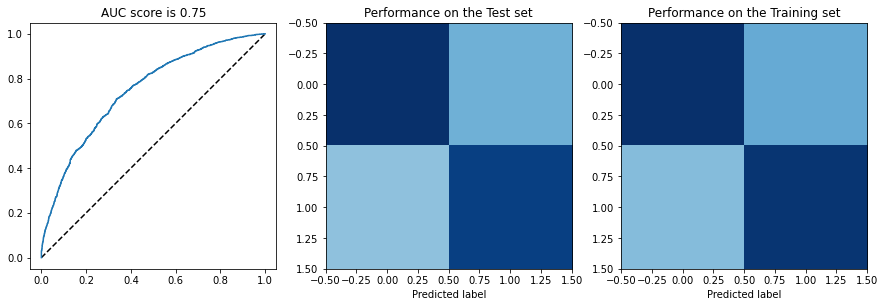

In [88]:
#Modelo por ranking

X, y = matches.loc[:,['average_rank', 'rank_difference', 'point_difference', 'is_stake']], matches['is_won']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=None)

logreg = linear_model.LogisticRegression(C=1e-5)
features = PolynomialFeatures(degree=2)
model = Pipeline([
    ('polynomial_features', features),
    ('logistic_regression', logreg)
])
model = model.fit(X_train, y_train)

# figures 
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure(figsize=(15,5))
ax = plt.subplot(1,3,1)
ax.plot([0, 1], [0, 1], 'k--')
ax.plot(fpr, tpr)
ax.set_title('AUC score is {0:0.2}'.format(roc_auc_score(y_test, model.predict_proba(X_test)[:,1])))
ax.set_aspect(1)

ax = plt.subplot(1,3,2)
cm = confusion_matrix(y_test, model.predict(X_test))
ax.imshow(cm, cmap='Blues', clim = (0, cm.max())) 

ax.set_xlabel('Predicted label')
ax.set_title('Performance on the Test set')

ax = plt.subplot(1,3,3)
cm = confusion_matrix(y_train, model.predict(X_train))
ax.imshow(cm, cmap='Blues', clim = (0, cm.max())) 
ax.set_xlabel('Predicted label')
ax.set_title('Performance on the Training set')
pass

In [89]:
world_cup_2 = world_cup
world_cup_3 = world_cup
world_cup_4 = world_cup
world_cup = world_cup.set_index('Team')
world_cup_2 = world_cup_2.set_index('Team')
world_cup_3 = world_cup_3.set_index('Team')
world_cup_4 = world_cup_4.set_index('Team')

KeyError: "None of ['Team'] are in the columns"

In [ ]:
# let's define the rankings at the time of the World Cup
world_cup_rankings = rankings.loc[(rankings['rank_date'] == rankings['rank_date'].max()) & 
                                    rankings['country_full'].isin(world_cup.index.unique())]
world_cup_rankings = world_cup_rankings.set_index(['country_full'])

EJECUTAMOS UNA SIMULACION DE 10000 REITERACIONES PARA VER QUIEN TIENE MAS CHANCES SOLO POR RANKING

In [90]:
margin = 0.03

import progressbar

simulation_results = list()
n_simulations = 10000
bar = progressbar.ProgressBar(maxval=n_simulations or None).start()

for i in range(n_simulations):
    bar.update(i)
    candidates = ['France', 'Argentina', 'Uruguay', 'Portugal', 'Spain','Croatia', 'Denmark', 'Netherlands', 'Brazil', 'Belgium', 'England','Germany','Mexico','Qatar'
                 #'Ecuador', 'Senegal','United States', 'Wales', 'Iran', ,'Poland','Saudi Arabia','Australia','Costa Rica','Tunisia',
                 #'Japan','Canada','Morocco','Cameroon', 'Serbia', 'Switzerland', 'Ghana', 'South Korea'
                 ]
    finals = ['round_of_16', 'quarterfinal', 'semifinal', 'final']

    for f in finals:
        iterations = int(len(candidates) / 2)
        winners = []

        for i in range(iterations):
            home = candidates[i*2]
            away = candidates[i*2+1]
            
            row = pd.DataFrame(np.array([[np.nan, np.nan, np.nan, True]]), columns=X_test.columns)
            home_rank = world_cup_rankings.loc[home, 'rank']
            home_points = world_cup_rankings.loc[home, 'total_points']
            opp_rank = world_cup_rankings.loc[away, 'rank']
            opp_points = world_cup_rankings.loc[away, 'total_points']
            row['average_rank'] = (home_rank + opp_rank) / 2
            row['rank_difference'] = home_rank - opp_rank
            row['point_difference'] = home_points - opp_points
            #print(home_rank,home_points,opp_rank,opp_points,row['average_rank'],row['rank_difference'],row['point_difference'])
            home_win_prob = model.predict_proba(row)[:,1][0]
            #print(home_win_prob)
            # simulation step based on the probability
            simulated_outcome = np.random.binomial(1, home_win_prob)
            #print(simulated_outcome)
            winners.append(away) if simulated_outcome <= (0.5 + margin) else winners.append(home)
            #print(winners)
        candidates = winners
        #print(candidates)
        simulations_results = simulation_results.append(candidates)
        #print(simulation_results)

simulation_results = sum(simulation_results, [])

Text(0.5, 0, 'Winning probability')

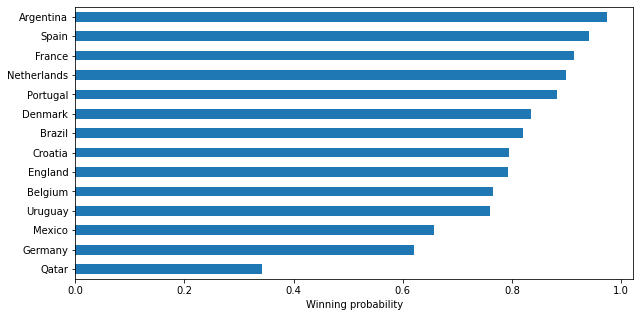

In [91]:
simulation_ranking = pd.Series(simulation_results).value_counts().sort_values().divide(n_simulations).plot.barh(figsize=(10,5))
plt.xlabel('Winning probability')

World Cup Simulation

Group Rounds

In [92]:
margin = 0.03
margin_rank = 0.3
margin_data = 0.7
margin_local = home_WinWCRatio
margin_localrival = home_LostWCRatio


from itertools import combinations

opponents = ['First_match_against', 'Second_match_against', 'Third_match_against']

world_cup['points'] = 0
world_cup['total_prob'] = 0
world_cup_3['points_rank'] = 0
world_cup_3['home_win_prob_rank'] = 0

for group in set(world_cup['Group']):
    print('___Starting group {}:___'.format(group))
    for home, away in combinations(world_cup.query('Group == "{}"'.format(group)).index, 2):
        print("{} vs. {}: ".format(home, away), end='')
        row = pd.DataFrame(np.array([[np.nan, np.nan, np.nan, True]]), columns=X_test.columns)
        
        home_rank = world_cup_rankings.loc[home, 'rank']
        home_points = world_cup_rankings.loc[home, 'total_points']
        
        opp_rank = world_cup_rankings.loc[away, 'rank']
        opp_points = world_cup_rankings.loc[away, 'total_points']
 
        row['average_rank'] = (home_rank + opp_rank) / 2
        row['rank_difference'] = home_rank - opp_rank
        row['point_difference'] = home_points - opp_points

        home_win_prob = model.predict_proba(row)[:,1][0]
        
        if (home == 'Qatar'):
            home_win_prob = home_win_prob * (1+margin_local)
        if (away == 'Qatar'):
            home_win_prob = home_win_prob * (1+margin_localrival)
        
        world_cup.loc[home, 'total_prob'] += home_win_prob
        world_cup.loc[away, 'total_prob'] += 1-home_win_prob
        world_cup_3.loc[home, 'home_win_prob_rank'] += home_win_prob
        world_cup_3.loc[away, 'home_win_prob_rank'] += 1-home_win_prob
        
        points = 0
        if round(home_win_prob,2) < 0.5 - margin:
            print("{0} wins 🏆🏆 with probability {1:.2f}".format(away, 1-home_win_prob))
            world_cup.loc[away, 'points'] += 3
            world_cup_3.loc[away, 'points_rank'] += 3
        if (0.5 - margin) <= round(home_win_prob,2) <= (0.5 + margin):
            points = 1
        if round(home_win_prob,2) > 0.5 + margin:
            print("{0} wins 🏆🏆 with probability {1:.2f}".format(home, home_win_prob))
            points = 3
            world_cup.loc[home, 'points'] += 3
            world_cup_3.loc[home, 'points_rank'] += 3
        if points == 1:
            print("Match Draw ⚽⚽")
            world_cup.loc[home, 'points'] += 1
            world_cup.loc[away, 'points'] += 1
            world_cup_3.loc[home, 'points_rank'] += 1
            world_cup_3.loc[away, 'points_rank'] += 1
        

___Starting group E:___
Costa Rica vs. Spain: Spain wins 🏆🏆 with probability 0.66
Costa Rica vs. Germany: Germany wins 🏆🏆 with probability 0.62
Costa Rica vs. Japan: Japan wins 🏆🏆 with probability 0.55
Spain vs. Germany: Spain wins 🏆🏆 with probability 0.54
Spain vs. Japan: Spain wins 🏆🏆 with probability 0.60
Germany vs. Japan: Germany wins 🏆🏆 with probability 0.56
___Starting group G:___
Brazil vs. Switzerland: Brazil wins 🏆🏆 with probability 0.63
Brazil vs. Cameroon: Brazil wins 🏆🏆 with probability 0.73
Brazil vs. Serbia: Brazil wins 🏆🏆 with probability 0.67
Switzerland vs. Cameroon: Switzerland wins 🏆🏆 with probability 0.62
Switzerland vs. Serbia: Switzerland wins 🏆🏆 with probability 0.54
Cameroon vs. Serbia: Serbia wins 🏆🏆 with probability 0.60
___Starting group B:___
England vs. Wales: England wins 🏆🏆 with probability 0.60
England vs. Iran: England wins 🏆🏆 with probability 0.61
England vs. United States: England wins 🏆🏆 with probability 0.57
Wales vs. Iran: Match Draw ⚽⚽
Wales vs. 

Single-elimination rounds

In [94]:
margin = 0.05
margin_rank = 0.3
margin_data = 0.7
margin_local = home_WinWCRatio
margin_localrival = home_LostWCRatio

pairing = [0,3,4,7,8,11,12,15,1,2,5,6,9,10,13,14]

world_cup = world_cup.sort_values(by=['Group', 'points', 'total_prob'], ascending=False).reset_index()
next_round_wc = world_cup.groupby('Group').nth([0, 1]) # select the top 2
next_round_wc = next_round_wc.reset_index()
next_round_wc = next_round_wc.loc[pairing]
next_round_wc = next_round_wc.set_index('Team')

finals = ['round_of_16', 'quarterfinal', 'semifinal', 'final']

labels = list()
odds = list()

for f in finals:
    print("___Starting of the {}___".format(f))
    iterations = int(len(next_round_wc) / 2)
    winners = []

    for i in range(iterations):
        home = next_round_wc.index[i*2]
        away = next_round_wc.index[i*2+1]
        team_list=[home,away]
        points = 0
        print("{} vs. {}: ".format(home,
                                   away), 
                                   end='')
        row = pd.DataFrame(np.array([[np.nan, np.nan, np.nan,True]]), columns=X_test.columns)
        
        home_rank = world_cup_rankings.loc[home, 'rank']
        home_points = world_cup_rankings.loc[home, 'total_points']
        
        opp_rank = world_cup_rankings.loc[away, 'rank']
        opp_points = world_cup_rankings.loc[away, 'total_points']
        
        row['average_rank'] = (home_rank + opp_rank) / 2
        row['rank_difference'] = home_rank - opp_rank
        row['point_difference'] = home_points - opp_points

        home_win_prob = model.predict_proba(row)[:,1][0]
        
        if (home == 'Qatar'):
            home_win_prob = home_win_prob * (1+margin_local)
        if (away == 'Qatar'):
            home_win_prob = home_win_prob * (1+margin_localrival)
            
        if round(home_win_prob,2) < 0.5 - margin:
            print("{0} wins 🏆🏆 with probability {1:.2f}".format(away, 1-home_win_prob))
            winners.append(away)
        if (0.5 - margin) <= round(home_win_prob,2) <= (0.5 + margin):
            points = 1
        if round(home_win_prob,2) > 0.5 + margin:
            print("{0} wins 🏆🏆 with probability {1:.2f}".format(home, home_win_prob))
            winners.append(home)
        if points == 1:
            print("Match Draw ⚽⚽")
            winning_team=random.choice(team_list)
            print(f"   {winning_team} wins at Penaly Shoot-Out 🥅🎯")
            winners.append(winning_team)  

        labels.append("{}({:.2f}) vs. {}({:.2f})".format(world_cup_rankings.loc[home, 'country_abrv'], 
                                                        1/home_win_prob, 
                                                        world_cup_rankings.loc[away, 'country_abrv'], 
                                                        1/(1-home_win_prob)))
        odds.append([home_win_prob, 1-home_win_prob])
                
    next_round_wc = next_round_wc.loc[winners]
    print("\n")

___Starting of the round_of_16___
Netherlands vs. United States: Match Draw ⚽⚽
   United States wins at Penaly Shoot-Out 🥅🎯
Argentina vs. Denmark: Argentina wins 🏆🏆 with probability 0.57
Spain vs. Croatia: Match Draw ⚽⚽
   Croatia wins at Penaly Shoot-Out 🥅🎯
Brazil vs. Uruguay: Brazil wins 🏆🏆 with probability 0.63
Qatar vs. England: Match Draw ⚽⚽
   Qatar wins at Penaly Shoot-Out 🥅🎯
Mexico vs. France: France wins 🏆🏆 with probability 0.58
Germany vs. Belgium: Belgium wins 🏆🏆 with probability 0.62
Switzerland vs. Portugal: Match Draw ⚽⚽
   Switzerland wins at Penaly Shoot-Out 🥅🎯


___Starting of the quarterfinal___
United States vs. Argentina: Argentina wins 🏆🏆 with probability 0.61
Croatia vs. Brazil: Brazil wins 🏆🏆 with probability 0.64
Qatar vs. France: France wins 🏆🏆 with probability 0.57
Belgium vs. Switzerland: Belgium wins 🏆🏆 with probability 0.62


___Starting of the semifinal___
Argentina vs. Brazil: Match Draw ⚽⚽
   Argentina wins at Penaly Shoot-Out 🥅🎯
France vs. Belgium: Matc

ANALIZAMOS CON LAS ULTIMAS ESTADISTICAS POR SELECCION

In [95]:

#world_cup = world_cup.set_index('Team')

# I want to have the ranks for every day 
#rankings = rankings.set_index(['rank_date'])\
#            .groupby(['country_full'], group_keys=False)\
#            .resample('D').first()\
#            .fillna(method='ffill')\
#            .reset_index()

# join the ranks
last10matches = last10matches.merge(world_cup10matches, 
                                    left_on=['home_team'], 
                                    right_on=['Team'])
last10matches = last10matches.merge(world_cup10matches, 
                                    left_on=['away_team'], 
                                    right_on=['Team'], 
                                    suffixes=('_home', '_away'))


In [96]:
last10matches=last10matches.drop_duplicates()

In [97]:
# feature generation
last10matches['rank_difference'] = last10matches['Current_FIFA_rank_home'] - last10matches['Current_FIFA_rank_away']
last10matches['average_rank'] = (last10matches['Current_FIFA_rank_home'] + last10matches['Current_FIFA_rank_away'])/2
#last10matches['point_difference'] = last10matches['total_points_home'] - last10matches['total_points_away']

#Modelo de rendimiento actual de las plantillas
last10matches['xGf_difference']=last10matches['xGf_home'] * last10matches['xGa_away']
last10matches['xGa_difference']=last10matches['xGf_away'] * last10matches['xGa_home']
last10matches['Gf_difference']=last10matches['Gf_home'] * last10matches['Ga_away']
last10matches['Ga_difference']=last10matches['Gf_away'] * last10matches['Ga_home']
last10matches['GoalsH_possibility']=(last10matches['Shots_home'] * last10matches['ShotConv_home']) * (1-last10matches['Cs_away'])
last10matches['GoalsA_possibility']=(last10matches['Shots_away'] * last10matches['ShotConv_away']) * (1-last10matches['Cs_home'])
last10matches['xG_homechances']=(last10matches['xGf_home'] * last10matches['xGa_away']) * (1-last10matches['Cs_away'])
last10matches['xG_awaychances']=(last10matches['xGf_away'] * last10matches['xGa_home']) * (1-last10matches['Cs_home'])

#Modelo de valor de las plantillas
last10matches['PPG_difference'] = last10matches['PPG_home'] - last10matches['PPG_away']
last10matches['average_PPG'] = (last10matches['PPG_home'] + last10matches['PPG_away'])/2
last10matches['value_difference'] = last10matches['Value_home'] - last10matches['Value_away']
last10matches['average_value'] = (last10matches['Value_home'] + last10matches['Value_away'])/2

last10matches['score_difference'] = last10matches['home_score'] - last10matches['away_score']
last10matches['is_won'] = last10matches['score_difference'] > 0 # take draw as lost
last10matches['is_stake'] = last10matches['tournament'] != 'Friendly'


# I tried earlier the team as well but that did not make a difference either
last10matches['wc_participant'] = last10matches['home_team'] * last10matches['home_team'].isin(world_cup.index.tolist())
last10matches['wc_participant'] = last10matches['wc_participant'].replace({'':'Other'})
last10matches = last10matches.join(pd.get_dummies(last10matches['wc_participant']))

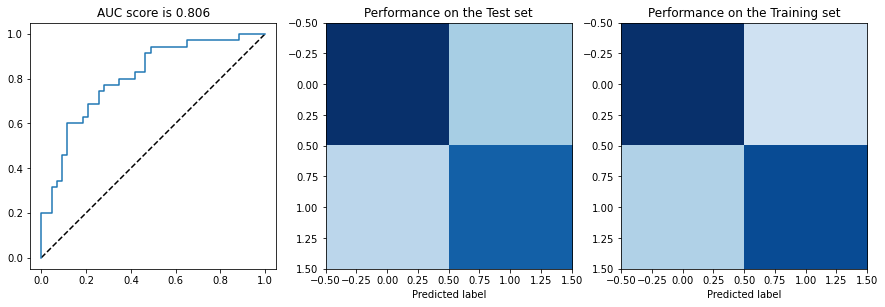

In [100]:
#Modelo por rendimiento actual

W, z = last10matches.loc[:,[#'PPG_difference','average_PPG',
                            'xGf_difference','xGa_difference','Gf_difference','Ga_difference','GoalsH_possibility','GoalsA_possibility',
                            'xG_homechances','xG_awaychances','is_stake']], last10matches['is_won']
W_train, W_test, z_train, z_test = train_test_split(W, z, test_size=0.3, random_state=None)

logreg10 = linear_model.LogisticRegression(C=1e-3)
features10 = PolynomialFeatures(degree=2)
model10 = Pipeline([
    ('polynomial_features', features10),
    ('logistic_regression', logreg10)
])
model10 = model10.fit(W_train, z_train)

# figures 
fpr, tpr, _ = roc_curve(z_test, model10.predict_proba(W_test)[:,1])
plt.figure(figsize=(15,5))
ax = plt.subplot(1,3,1)
ax.plot([0, 1], [0, 1], 'k--')
ax.plot(fpr, tpr)
ax.set_title('AUC score is {0:0.3}'.format(roc_auc_score(z_test, model10.predict_proba(W_test)[:,1])))
ax.set_aspect(1)

ax = plt.subplot(1,3,2)
cm = confusion_matrix(z_test, model10.predict(W_test))
ax.imshow(cm, cmap='Blues', clim = (0, cm.max())) 

ax.set_xlabel('Predicted label')
ax.set_title('Performance on the Test set')

ax = plt.subplot(1,3,3)
cm = confusion_matrix(z_train, model10.predict(W_train))
ax.imshow(cm, cmap='Blues', clim = (0, cm.max())) 
ax.set_xlabel('Predicted label')
ax.set_title('Performance on the Training set')
pass

In [101]:
# let's define the data for all teams of the World Cup
world_cup_dataTeams = world_cup[['Team','country_abrv','Current_FIFA_rank','PPG','xGf','xGa','Gf','Ga','Cs','Poss','Shots','ShotConv','Value','Age']].copy()
world_cup_dataTeams = world_cup_dataTeams.set_index(['Team'])


In [102]:
margin = 0.03

import progressbar

simulation_results10 = list()
n_simulations = 10000
bar = progressbar.ProgressBar(maxval=n_simulations or None).start()

for i in range(n_simulations):
    bar.update(i)
    candidates = ['France', 'Argentina', 'Uruguay', 'Portugal', 'Spain','Croatia', 'Denmark', 'Netherlands', 'Brazil', 'Belgium', 'England','Germany','Mexico','Qatar'
                 #'Ecuador', 'Senegal','United States', 'Wales', 'Iran', ,'Poland','Saudi Arabia','Australia','Costa Rica','Tunisia',
                 #'Japan','Canada','Morocco','Cameroon', 'Serbia', 'Switzerland', 'Ghana', 'South Korea'
                 ]
    finals = ['round_of_16', 'quarterfinal', 'semifinal', 'final']

    for f in finals:
        iterations = int(len(candidates) / 2)
        winners = []

        for i in range(iterations):
            home = candidates[i*2]
            away = candidates[i*2+1]
            
            row = pd.DataFrame(np.array([[#np.nan, np.nan, 
                                          np.nan, np.nan, np.nan, np.nan,np.nan, np.nan, np.nan, np.nan, True]]), columns=W_test.columns)

            home_PPG = world_cup_dataTeams.loc[home, 'PPG']
            home_xGf = world_cup_dataTeams.loc[home, 'xGf']
            home_xGa = world_cup_dataTeams.loc[home, 'xGa']
            home_Gf = world_cup_dataTeams.loc[home, 'Gf']
            home_Ga = world_cup_dataTeams.loc[home, 'Ga']        
            home_Shots = world_cup_dataTeams.loc[home, 'Shots']
            home_ShotConv = world_cup_dataTeams.loc[home, 'ShotConv']
            home_Cs = world_cup_dataTeams.loc[home, 'Cs']

            opp_PPG = world_cup_dataTeams.loc[away, 'PPG']
            opp_xGf = world_cup_dataTeams.loc[away, 'xGf']
            opp_xGa = world_cup_dataTeams.loc[away, 'xGa']
            opp_Gf = world_cup_dataTeams.loc[away, 'Gf']
            opp_Ga = world_cup_dataTeams.loc[away, 'Ga']         
            opp_Shots = world_cup_dataTeams.loc[away, 'Shots']
            opp_ShotConv = world_cup_dataTeams.loc[away, 'ShotConv']
            opp_Cs = world_cup_dataTeams.loc[away, 'Cs']

            #row['PPG_difference'] = (home_PPG - opp_PPG)
            #row['average_PPG'] = (home_PPG + opp_PPG)/2
            row['xGf_difference'] = (home_xGf * opp_xGa)
            row['xGa_difference'] = (opp_xGf * home_xGa)
            row['Gf_difference'] = (home_Gf * opp_Ga)
            row['Ga_difference'] = (opp_Gf * home_Ga)
            row['GoalsH_possibility'] = (home_Shots * home_ShotConv) * (1 - opp_Cs)
            row['GoalsA_possibility'] = (opp_Shots * opp_ShotConv) * (1 - home_Cs)
            row['xG_homechances'] = (((home_xGf * opp_xGa) + (home_Shots * home_ShotConv)) * (1-opp_Cs))/2
            row['xG_awaychances'] = (((opp_xGf * home_xGa) + (opp_Shots * opp_ShotConv)) * (1-home_Cs))/2

            xG_homechances = (((home_xGf * opp_xGa) + (home_Shots * home_ShotConv)) * (1-opp_Cs))/2
            xG_awaychances = (((opp_xGf * home_xGa) + (opp_Shots * opp_ShotConv)) * (1-home_Cs))/2
            #print(home_rank,home_points,opp_rank,opp_points,row['average_rank'],row['rank_difference'],row['point_difference'])
            home_win_prob = model10.predict_proba(row)[:,1][0]
            #print(home_win_prob)
            # simulation step based on the probability
            simulated_outcome10 = np.random.binomial(1, home_win_prob)
            #print(simulated_outcome)
            winners.append(away) if simulated_outcome10 <= (0.5 - margin) else winners.append(home)
            #print(winners)
        candidates = winners
        #print(candidates)
        simulations_results10 = simulation_results10.append(candidates)
        #print(simulation_results)

simulation_results10 = sum(simulation_results10, [])

Text(0.5, 0, 'Winning probability')

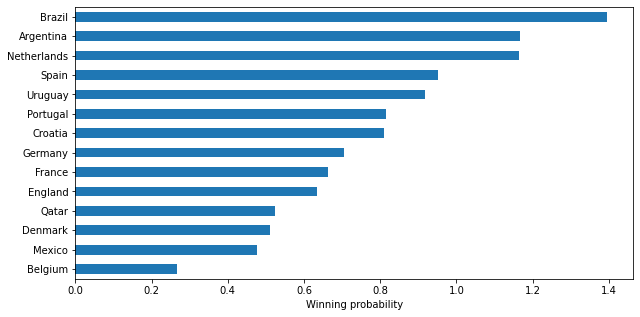

In [103]:
pd.Series(simulation_results10).value_counts().sort_values().divide(n_simulations).plot.barh(figsize=(10,5))
plt.xlabel('Winning probability')

In [104]:
margin = 0.03
margin_rank = 0.3
margin_data = 0.7
margin_local = home_WinWCRatio
margin_localrival = home_LostWCRatio

from itertools import combinations

opponents = ['First_match_against', 'Second_match_against', 'Third_match_against']

world_cup_2['points'] = 0
world_cup_2['total_prob'] = 0
world_cup_3['points_data'] = 0
world_cup_3['home_win_prob_data'] = 0

for group in set(world_cup_2['Group']):
    print('___Starting group {}:___'.format(group))
    for home, away in combinations(world_cup_2.query('Group == "{}"'.format(group)).index, 2):
        print("{} vs. {}: ".format(home, away), end='')
        row = pd.DataFrame(np.array([[#np.nan, np.nan, 
                                      np.nan, np.nan, np.nan, np.nan,np.nan, np.nan, np.nan, np.nan, True]]), columns=W_test.columns)

        home_PPG = world_cup_dataTeams.loc[home, 'PPG']
        home_xGf = world_cup_dataTeams.loc[home, 'xGf']
        home_xGa = world_cup_dataTeams.loc[home, 'xGa']
        home_Gf = world_cup_dataTeams.loc[home, 'Gf']
        home_Ga = world_cup_dataTeams.loc[home, 'Ga']        
        home_Shots = world_cup_dataTeams.loc[home, 'Shots']
        home_ShotConv = world_cup_dataTeams.loc[home, 'ShotConv']
        home_Cs = world_cup_dataTeams.loc[home, 'Cs']

        opp_PPG = world_cup_dataTeams.loc[away, 'PPG']
        opp_xGf = world_cup_dataTeams.loc[away, 'xGf']
        opp_xGa = world_cup_dataTeams.loc[away, 'xGa']
        opp_Gf = world_cup_dataTeams.loc[away, 'Gf']
        opp_Ga = world_cup_dataTeams.loc[away, 'Ga']         
        opp_Shots = world_cup_dataTeams.loc[away, 'Shots']
        opp_ShotConv = world_cup_dataTeams.loc[away, 'ShotConv']
        opp_Cs = world_cup_dataTeams.loc[away, 'Cs']

        #row['PPG_difference'] = (home_PPG - opp_PPG)
        #row['average_PPG'] = (home_PPG + opp_PPG)/2
        row['xGf_difference'] = (home_xGf * opp_xGa)
        row['xGa_difference'] = (opp_xGf * home_xGa)
        row['Gf_difference'] = (home_Gf * opp_Ga)
        row['Ga_difference'] = (opp_Gf * home_Ga)
        row['GoalsH_possibility'] = (home_Shots * home_ShotConv) * (1 - opp_Cs)
        row['GoalsA_possibility'] = (opp_Shots * opp_ShotConv) * (1 - home_Cs)
        row['xG_homechances'] = (((home_xGf * opp_xGa) + (home_Shots * home_ShotConv)) * (1-opp_Cs))/2
        row['xG_awaychances'] = (((opp_xGf * home_xGa) + (opp_Shots * opp_ShotConv)) * (1-home_Cs))/2

        xG_homechances = (((home_xGf * opp_xGa) + (home_Shots * home_ShotConv)) * (1-opp_Cs))/2
        xG_awaychances = (((opp_xGf * home_xGa) + (opp_Shots * opp_ShotConv)) * (1-home_Cs))/2   

        home_win_prob = model10.predict_proba(row)[:,1][0]
        
        if (home == 'Qatar'):
            home_win_prob = home_win_prob * (1+margin_local)
        if (away == 'Qatar'):
            home_win_prob = home_win_prob * (1+margin_localrival)
            
        world_cup_2.loc[home, 'total_prob'] += home_win_prob
        world_cup_2.loc[away, 'total_prob'] += 1-home_win_prob
        world_cup_3.loc[home, 'home_win_prob_data'] += home_win_prob
        world_cup_3.loc[away, 'home_win_prob_data'] += 1-home_win_prob
        
        points = 0
        if round(home_win_prob,2) < 0.5 - margin:
            print("{0} wins 🏆🏆 with probability {1:.2f}".format(away, 1-home_win_prob))
            if {int(round(xG_awaychances,0))} == {int(round(xG_homechances,0))}:
                print(f"{away} wins 🏆🏆 {int(round(xG_awaychances+1,0))} to {int(round(xG_homechances,0))}") 
            else:
                print(f"{away} wins 🏆🏆 {int(round(xG_awaychances,0))} to {int(round(xG_homechances,0))}") 
            world_cup_2.loc[away, 'points'] += 3
            world_cup_3.loc[away, 'points_data'] += 3
        if (0.5 - margin) <= round(home_win_prob,2) <= (0.5 + margin):
            points = 1
        if round(home_win_prob,2) > 0.5 + margin:
            print("{0} wins 🏆🏆 with probability {1:.2f}".format(home, home_win_prob))
            if {int(round(xG_homechances,0))} == {int(round(xG_awaychances,0))}:
                print(f"{home} wins 🏆🏆 {int(round(xG_homechances+1,0))} to {int(round(xG_awaychances,0))}") 
            else:
                print(f"{home} wins 🏆🏆 {int(round(xG_homechances,0))} to {int(round(xG_awaychances,0))}") 
            points = 3
            world_cup_2.loc[home, 'points'] += 3
            world_cup_3.loc[home, 'points_data'] += 3
        if points == 1:
            if {int(round(xG_awaychances,0))} == {int(round(xG_homechances,0))}:
                print(f"Match Draw ⚽⚽ {int(round(xG_awaychances,0))} to {int(round(xG_homechances,0))}") 
            else:
                print(f"Match Draw ⚽⚽ {int(round(xG_homechances,0))} to {int(round(xG_homechances,0))}") 
            world_cup_2.loc[home, 'points'] += 1
            world_cup_2.loc[away, 'points'] += 1
            world_cup_3.loc[home, 'points_data'] += 1
            world_cup_3.loc[away, 'points_data'] += 1
            

___Starting group E:___
Costa Rica vs. Spain: Spain wins 🏆🏆 with probability 0.59
Spain wins 🏆🏆 1 to 0
Costa Rica vs. Germany: Germany wins 🏆🏆 with probability 0.60
Germany wins 🏆🏆 2 to 1
Costa Rica vs. Japan: Japan wins 🏆🏆 with probability 0.61
Japan wins 🏆🏆 1 to 0
Spain vs. Germany: Match Draw ⚽⚽ 1 to 1
Spain vs. Japan: Japan wins 🏆🏆 with probability 0.55
Japan wins 🏆🏆 1 to 0
Germany vs. Japan: Japan wins 🏆🏆 with probability 0.60
Japan wins 🏆🏆 2 to 1
___Starting group G:___
Brazil vs. Switzerland: Brazil wins 🏆🏆 with probability 0.84
Brazil wins 🏆🏆 2 to 0
Brazil vs. Cameroon: Brazil wins 🏆🏆 with probability 0.74
Brazil wins 🏆🏆 2 to 0
Brazil vs. Serbia: Brazil wins 🏆🏆 with probability 0.68
Brazil wins 🏆🏆 2 to 1
Switzerland vs. Cameroon: Cameroon wins 🏆🏆 with probability 0.56
Cameroon wins 🏆🏆 2 to 1
Switzerland vs. Serbia: Serbia wins 🏆🏆 with probability 0.68
Serbia wins 🏆🏆 2 to 1
Cameroon vs. Serbia: Serbia wins 🏆🏆 with probability 0.62
Serbia wins 🏆🏆 2 to 1
___Starting group B:___
En

In [188]:
world_cup_2=world_cup_2.drop(columns=['level_0','index'], axis=1)

In [189]:
margin = 0.05
margin_rank = 0.3
margin_data = 0.7
margin_local = home_WinWCRatio
margin_localrival = home_LostWCRatio


pairing = [0,3,4,7,8,11,12,15,1,2,5,6,9,10,13,14]

world_cup_2 = world_cup_2.sort_values(by=['Group', 'points', 'total_prob'], ascending=False).reset_index()
next_round_wc = world_cup_2.groupby('Group').nth([0, 1]) # select the top 2
next_round_wc = next_round_wc.reset_index()
next_round_wc = next_round_wc.loc[pairing]
next_round_wc = next_round_wc.set_index('Team')

finals = ['round_of_16', 'quarterfinal', 'semifinal', 'final']

labels = list()
odds = list()

for f in finals:
    print("___Starting of the {}___".format(f))
    iterations = int(len(next_round_wc) / 2)
    winners = []

    for i in range(iterations):
        home = next_round_wc.index[i*2]
        away = next_round_wc.index[i*2+1]
        team_list=[home,away]
        points = 0
        print("{} vs. {}: ".format(home,
                                   away), 
                                   end='')
        row = pd.DataFrame(np.array([[#np.nan, np.nan, 
                                      np.nan, np.nan, np.nan, np.nan,np.nan, np.nan, np.nan, np.nan, True]]), columns=W_test.columns)

        home_PPG = world_cup_dataTeams.loc[home, 'PPG']
        home_xGf = world_cup_dataTeams.loc[home, 'xGf']
        home_xGa = world_cup_dataTeams.loc[home, 'xGa']
        home_Gf = world_cup_dataTeams.loc[home, 'Gf']
        home_Ga = world_cup_dataTeams.loc[home, 'Ga']        
        home_Shots = world_cup_dataTeams.loc[home, 'Shots']
        home_ShotConv = world_cup_dataTeams.loc[home, 'ShotConv']
        home_Cs = world_cup_dataTeams.loc[home, 'Cs']

        opp_PPG = world_cup_dataTeams.loc[away, 'PPG']
        opp_xGf = world_cup_dataTeams.loc[away, 'xGf']
        opp_xGa = world_cup_dataTeams.loc[away, 'xGa']
        opp_Gf = world_cup_dataTeams.loc[away, 'Gf']
        opp_Ga = world_cup_dataTeams.loc[away, 'Ga']         
        opp_Shots = world_cup_dataTeams.loc[away, 'Shots']
        opp_ShotConv = world_cup_dataTeams.loc[away, 'ShotConv']
        opp_Cs = world_cup_dataTeams.loc[away, 'Cs']

        #row['PPG_difference'] = (home_PPG - opp_PPG)
        #row['average_PPG'] = (home_PPG + opp_PPG)/2
        row['xGf_difference'] = (home_xGf * opp_xGa)
        row['xGa_difference'] = (opp_xGf * home_xGa)
        row['Gf_difference'] = (home_Gf * opp_Ga)
        row['Ga_difference'] = (opp_Gf * home_Ga)
        row['GoalsH_possibility'] = (home_Shots * home_ShotConv) * (1 - opp_Cs)
        row['GoalsA_possibility'] = (opp_Shots * opp_ShotConv) * (1 - home_Cs)
        row['xG_homechances'] = (((home_xGf * opp_xGa) + (home_Shots * home_ShotConv)) * (1-opp_Cs))/2
        row['xG_awaychances'] = (((opp_xGf * home_xGa) + (opp_Shots * opp_ShotConv)) * (1-home_Cs))/2

        xG_homechances = (((home_xGf * opp_xGa) + (home_Shots * home_ShotConv)) * (1-opp_Cs))/2
        xG_awaychances = (((opp_xGf * home_xGa) + (opp_Shots * opp_ShotConv)) * (1-home_Cs))/2
        
        home_win_prob = model10.predict_proba(row)[:,1][0]
            
        if (home == 'Qatar'):
            home_win_prob = home_win_prob * (1+margin_local)
        if (away == 'Qatar'):
            home_win_prob = home_win_prob * (1+margin_localrival)
        
        if round(home_win_prob,2) < 0.5 - margin:
            print("{0} wins 🏆🏆 with probability {1:.2f}".format(away, 1-home_win_prob))
            if {int(round(xG_awaychances,0))} == {int(round(xG_homechances,0))}:
                print(f"{away} wins 🏆🏆 {int(round(xG_awaychances+1,0))} to {int(round(xG_homechances,0))}") 
            else:
                print(f"{away} wins 🏆🏆 {int(round(xG_awaychances,0))} to {int(round(xG_homechances,0))}") 
            winners.append(away)
        if (0.5 - margin) <= round(home_win_prob,2) <= (0.5 + margin):
            points = 1
        if round(home_win_prob,2) > 0.5 + margin:
            print("{0} wins 🏆🏆 with probability {1:.2f}".format(home, home_win_prob))
            if {int(round(xG_homechances,0))} == {int(round(xG_awaychances,0))}:
                print(f"{home} wins 🏆🏆 {int(round(xG_homechances+1,0))} to {int(round(xG_awaychances,0))}") 
            else:
                print(f"{home} wins 🏆🏆 {int(round(xG_homechances,0))} to {int(round(xG_awaychances,0))}") 
            winners.append(home)
        if points == 1:
            if {int(round(xG_awaychances,0))} == {int(round(xG_homechances,0))}:
                print(f"Match Draw ⚽⚽ {int(round(xG_awaychances,0))} to {int(round(xG_homechances,0))}") 
            else:
                print(f"Match Draw ⚽⚽ {int(round(xG_homechances,0))} to {int(round(xG_homechances,0))}") 
            winning_team=random.choice(team_list)
            print(f"   {winning_team} wins at Penaly Shoot-Out 🥅🎯")
            winners.append(winning_team)       
            
        labels.append("{}({:.2f}) vs. {}({:.2f})".format(world_cup_dataTeams.loc[home, 'country_abrv'], 
                                                        1/home_win_prob, 
                                                        world_cup_dataTeams.loc[away, 'country_abrv'], 
                                                        1/(1-home_win_prob)))
        odds.append([home_win_prob, 1-home_win_prob])
                
    next_round_wc = next_round_wc.loc[winners]
    print("\n")

___Starting of the round_of_16___
Qatar vs. England: Qatar wins 🏆🏆 with probability 0.62
Qatar wins 🏆🏆 2 to 1
Argentina vs. Tunisia: Argentina wins 🏆🏆 with probability 0.57
Argentina wins 🏆🏆 1 to 0
Japan vs. Croatia: Japan wins 🏆🏆 with probability 0.57
Japan wins 🏆🏆 2 to 1
Brazil vs. Portugal: Brazil wins 🏆🏆 with probability 0.62
Brazil wins 🏆🏆 1 to 0
Netherlands vs. United States: United States wins 🏆🏆 with probability 0.57
United States wins 🏆🏆 2 to 1
Mexico vs. France: France wins 🏆🏆 with probability 0.62
France wins 🏆🏆 2 to 1
Spain vs. Canada: Match Draw ⚽⚽ 1 to 1
   Spain wins at Penaly Shoot-Out 🥅🎯
Serbia vs. Uruguay: Uruguay wins 🏆🏆 with probability 0.59
Uruguay wins 🏆🏆 2 to 1


___Starting of the quarterfinal___
Qatar vs. Argentina: Match Draw ⚽⚽ 0 to 0
   Argentina wins at Penaly Shoot-Out 🥅🎯
Japan vs. Brazil: Match Draw ⚽⚽ 1 to 1
   Brazil wins at Penaly Shoot-Out 🥅🎯
United States vs. France: Match Draw ⚽⚽ 1 to 1
   France wins at Penaly Shoot-Out 🥅🎯
Spain vs. Uruguay: Match 

/home/morron87/miniconda3/envs/py3_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



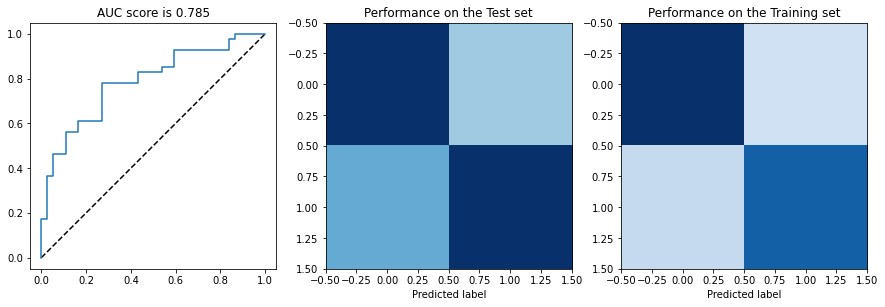

In [194]:
#Modelo de valoracion plantilla

T, s = last10matches.loc[:,['PPG_difference','average_PPG',
                            'value_difference','average_value','is_stake']], last10matches['is_won']
T_train, T_test, s_train, s_test = train_test_split(T, s, test_size=0.3, random_state=None)

logreg20 = linear_model.LogisticRegression(C=1e-3)
features20 = PolynomialFeatures(degree=2)
model20 = Pipeline([
    ('polynomial_features', features20),
    ('logistic_regression', logreg20)
])
model20 = model20.fit(T_train, s_train)

# figures 
fpr, tpr, _ = roc_curve(s_test, model20.predict_proba(T_test)[:,1])
plt.figure(figsize=(15,5))
ax = plt.subplot(1,3,1)
ax.plot([0, 1], [0, 1], 'k--')
ax.plot(fpr, tpr)
ax.set_title('AUC score is {0:0.3}'.format(roc_auc_score(s_test, model20.predict_proba(T_test)[:,1])))
ax.set_aspect(1)

ax = plt.subplot(1,3,2)
cm = confusion_matrix(s_test, model20.predict(T_test))
ax.imshow(cm, cmap='Blues', clim = (0, cm.max())) 

ax.set_xlabel('Predicted label')
ax.set_title('Performance on the Test set')

ax = plt.subplot(1,3,3)
cm = confusion_matrix(s_train, model20.predict(T_train))
ax.imshow(cm, cmap='Blues', clim = (0, cm.max())) 
ax.set_xlabel('Predicted label')
ax.set_title('Performance on the Training set')
pass

In [195]:
margin = 0.05

import progressbar

simulation_results20 = list()
n_simulations = 10000
bar = progressbar.ProgressBar(maxval=n_simulations or None).start()

for i in range(n_simulations):
    bar.update(i)
    candidates = ['France', 'Argentina', 'Uruguay', 'Portugal', 'Spain','Croatia', 'Denmark', 'Netherlands', 'Brazil', 'Belgium', 'England','Germany','Mexico','Qatar'
                 #'Ecuador', 'Senegal','United States', 'Wales', 'Iran', ,'Poland','Saudi Arabia','Australia','Costa Rica','Tunisia',
                 #'Japan','Canada','Morocco','Cameroon', 'Serbia', 'Switzerland', 'Ghana', 'South Korea'
                 ]
    finals = ['round_of_16', 'quarterfinal', 'semifinal', 'final']

    for f in finals:
        iterations = int(len(candidates) / 2)
        winners = []

        for i in range(iterations):
            home = candidates[i*2]
            away = candidates[i*2+1]
            
            row = pd.DataFrame(np.array([[np.nan, np.nan, 
                                          np.nan, np.nan, True]]), columns=T_test.columns)

            home_PPG = world_cup_dataTeams.loc[home, 'PPG']
            home_Value = world_cup_dataTeams.loc[home, 'Value']

            opp_PPG = world_cup_dataTeams.loc[away, 'PPG']
            opp_Value = world_cup_dataTeams.loc[away, 'Value']

            row['PPG_difference'] = (home_PPG - opp_PPG)
            row['average_PPG'] = (home_PPG + opp_PPG)/2
            row['value_difference'] = (home_Value - opp_Value)
            row['average_value'] = (opp_Value + home_Value)/2
           
            home_win_prob = model20.predict_proba(row)[:,1][0]
            #print(home_win_prob)
            # simulation step based on the probability
            simulated_outcome20 = np.random.binomial(1, home_win_prob)
            #print(simulated_outcome)
            winners.append(away) if simulated_outcome20 <= (0.5 - margin) else winners.append(home)
            #print(winners)
        candidates = winners
        #print(candidates)
        simulations_results20 = simulation_results20.append(candidates)
        #print(simulation_results)

simulation_results20 = sum(simulation_results20, [])

Text(0.5, 0, 'Winning probability')

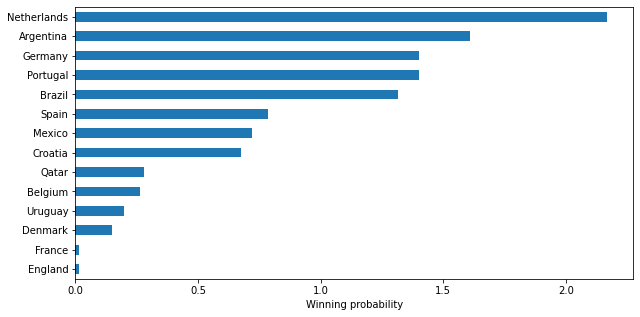

In [196]:
pd.Series(simulation_results20).value_counts().sort_values().divide(n_simulations).plot.barh(figsize=(10,5))
plt.xlabel('Winning probability')

In [204]:
world_cup_4=world_cup_4.drop(columns=['index'], axis=1)

In [215]:
world_cup_4 = world_cup
world_cup_4 = world_cup_4.set_index('Team')

In [216]:
margin = 0.03
margin_rank = 0.3
margin_data = 0.7
margin_local = home_WinWCRatio
margin_localrival = home_LostWCRatio

from itertools import combinations

opponents = ['First_match_against', 'Second_match_against', 'Third_match_against']

world_cup_4['points'] = 0
world_cup_4['total_prob'] = 0
world_cup_3['points_value'] = 0
world_cup_3['home_win_prob_value'] = 0

for group in set(world_cup_4['Group']):
    print('___Starting group {}:___'.format(group))
    for home, away in combinations(world_cup_4.query('Group == "{}"'.format(group)).index, 2):
        print("{} vs. {}: ".format(home, away), end='')
        row = pd.DataFrame(np.array([[np.nan, np.nan, 
                                      np.nan, np.nan, True]]), columns=T_test.columns)

        home_PPG = world_cup_dataTeams.loc[home, 'PPG']
        home_Value = world_cup_dataTeams.loc[home, 'Value']

        opp_PPG = world_cup_dataTeams.loc[away, 'PPG']
        opp_Value = world_cup_dataTeams.loc[away, 'Value']

        row['PPG_difference'] = (home_PPG - opp_PPG)
        row['average_PPG'] = (home_PPG + opp_PPG)/2
        row['value_difference'] = (home_Value - opp_Value)
        row['average_value'] = (opp_Value + home_Value)/2

        home_win_prob = model20.predict_proba(row)[:,1][0]
        
        if (home == 'Qatar'):
            home_win_prob = home_win_prob * (1+margin_local)
        if (away == 'Qatar'):
            home_win_prob = home_win_prob * (1+margin_localrival)
            
        world_cup_4.loc[home, 'total_prob'] += home_win_prob
        world_cup_4.loc[away, 'total_prob'] += 1-home_win_prob
        world_cup_3.loc[home, 'home_win_prob_value'] += home_win_prob
        world_cup_3.loc[away, 'home_win_prob_value'] += 1-home_win_prob
        
        points = 0
        if round(home_win_prob,2) < 0.5 - margin:
            print("{0} wins 🏆🏆 with probability {1:.2f}".format(away, 1-home_win_prob))
            if {int(round(xG_awaychances,0))} == {int(round(xG_homechances,0))}:
                print(f"{away} wins 🏆🏆 {int(round(xG_awaychances+1,0))} to {int(round(xG_homechances,0))}") 
            else:
                print(f"{away} wins 🏆🏆 {int(round(xG_awaychances,0))} to {int(round(xG_homechances,0))}") 
            world_cup_4.loc[away, 'points'] += 3
            world_cup_3.loc[away, 'points_value'] += 3
        if (0.5 - margin) <= round(home_win_prob,2) <= (0.5 + margin):
            points = 1
        if round(home_win_prob,2) > 0.5 + margin:
            print("{0} wins 🏆🏆 with probability {1:.2f}".format(home, home_win_prob))
            if {int(round(xG_homechances,0))} == {int(round(xG_awaychances,0))}:
                print(f"{home} wins 🏆🏆 {int(round(xG_homechances+1,0))} to {int(round(xG_awaychances,0))}") 
            else:
                print(f"{home} wins 🏆🏆 {int(round(xG_homechances,0))} to {int(round(xG_awaychances,0))}") 
            points = 3
            world_cup_4.loc[home, 'points'] += 3
            world_cup_3.loc[home, 'points_value'] += 3
        if points == 1:
            if {int(round(xG_awaychances,0))} == {int(round(xG_homechances,0))}:
                print(f"Match Draw ⚽⚽ {int(round(xG_awaychances,0))} to {int(round(xG_homechances,0))}") 
            else:
                print(f"Match Draw ⚽⚽ {int(round(xG_homechances,0))} to {int(round(xG_homechances,0))}") 
            world_cup_4.loc[home, 'points'] += 1
            world_cup_4.loc[away, 'points'] += 1
            world_cup_3.loc[home, 'points_value'] += 1
            world_cup_3.loc[away, 'points_value'] += 1
            

___Starting group E:___
Spain vs. Germany: Germany wins 🏆🏆 with probability 0.57
Germany wins 🏆🏆 0 to 1
Spain vs. Japan: Spain wins 🏆🏆 with probability 0.87
Spain wins 🏆🏆 1 to 0
Spain vs. Costa Rica: Spain wins 🏆🏆 with probability 0.95
Spain wins 🏆🏆 1 to 0
Germany vs. Japan: Germany wins 🏆🏆 with probability 0.57
Germany wins 🏆🏆 1 to 0
Germany vs. Costa Rica: Germany wins 🏆🏆 with probability 0.81
Germany wins 🏆🏆 1 to 0
Japan vs. Costa Rica: Japan wins 🏆🏆 with probability 0.68
Japan wins 🏆🏆 1 to 0
___Starting group G:___
Brazil vs. Switzerland: Brazil wins 🏆🏆 with probability 0.99
Brazil wins 🏆🏆 1 to 0
Brazil vs. Serbia: Brazil wins 🏆🏆 with probability 0.79
Brazil wins 🏆🏆 1 to 0
Brazil vs. Cameroon: Brazil wins 🏆🏆 with probability 1.00
Brazil wins 🏆🏆 1 to 0
Switzerland vs. Serbia: Serbia wins 🏆🏆 with probability 0.87
Serbia wins 🏆🏆 0 to 1
Switzerland vs. Cameroon: Match Draw ⚽⚽ 1 to 1
Serbia vs. Cameroon: Serbia wins 🏆🏆 with probability 0.82
Serbia wins 🏆🏆 1 to 0
___Starting group B:___


In [217]:
margin = 0.05
margin_rank = 0.3
margin_data = 0.7
margin_local = home_WinWCRatio
margin_localrival = home_LostWCRatio


pairing = [0,3,4,7,8,11,12,15,1,2,5,6,9,10,13,14]

world_cup_4 = world_cup_4.sort_values(by=['Group', 'points', 'total_prob'], ascending=False).reset_index()
next_round_wc = world_cup_4.groupby('Group').nth([0, 1]) # select the top 2
next_round_wc = next_round_wc.reset_index()
next_round_wc = next_round_wc.loc[pairing]
next_round_wc = next_round_wc.set_index('Team')

finals = ['round_of_16', 'quarterfinal', 'semifinal', 'final']

labels = list()
odds = list()

for f in finals:
    print("___Starting of the {}___".format(f))
    iterations = int(len(next_round_wc) / 2)
    winners = []

    for i in range(iterations):
        home = next_round_wc.index[i*2]
        away = next_round_wc.index[i*2+1]
        team_list=[home,away]
        points = 0
        print("{} vs. {}: ".format(home,
                                   away), 
                                   end='')
        row = pd.DataFrame(np.array([[np.nan, np.nan, 
                                      np.nan, np.nan, True]]), columns=T_test.columns)

        home_PPG = world_cup_dataTeams.loc[home, 'PPG']
        home_Value = world_cup_dataTeams.loc[home, 'Value']

        opp_PPG = world_cup_dataTeams.loc[away, 'PPG']
        opp_Value = world_cup_dataTeams.loc[away, 'Value']

        row['PPG_difference'] = (home_PPG - opp_PPG)
        row['average_PPG'] = (home_PPG + opp_PPG)/2
        row['value_difference'] = (home_Value - opp_Value)
        row['average_value'] = (opp_Value + home_Value)/2
        
        home_win_prob = model20.predict_proba(row)[:,1][0]
            
        if (home == 'Qatar'):
            home_win_prob = home_win_prob * (1+margin_local)
        if (away == 'Qatar'):
            home_win_prob = home_win_prob * (1+margin_localrival)
        
        if round(home_win_prob,2) < 0.5 - margin:
            print("{0} wins 🏆🏆 with probability {1:.2f}".format(away, 1-home_win_prob))
            if {int(round(xG_awaychances,0))} == {int(round(xG_homechances,0))}:
                print(f"{away} wins 🏆🏆 {int(round(xG_awaychances+1,0))} to {int(round(xG_homechances,0))}") 
            else:
                print(f"{away} wins 🏆🏆 {int(round(xG_awaychances,0))} to {int(round(xG_homechances,0))}") 
            winners.append(away)
        if (0.5 - margin) <= round(home_win_prob,2) <= (0.5 + margin):
            points = 1
        if round(home_win_prob,2) > 0.5 + margin:
            print("{0} wins 🏆🏆 with probability {1:.2f}".format(home, home_win_prob))
            if {int(round(xG_homechances,0))} == {int(round(xG_awaychances,0))}:
                print(f"{home} wins 🏆🏆 {int(round(xG_homechances+1,0))} to {int(round(xG_awaychances,0))}") 
            else:
                print(f"{home} wins 🏆🏆 {int(round(xG_homechances,0))} to {int(round(xG_awaychances,0))}") 
            winners.append(home)
        if points == 1:
            if {int(round(xG_awaychances,0))} == {int(round(xG_homechances,0))}:
                print(f"Match Draw ⚽⚽ {int(round(xG_awaychances,0))} to {int(round(xG_homechances,0))}") 
            else:
                print(f"Match Draw ⚽⚽ {int(round(xG_homechances,0))} to {int(round(xG_homechances,0))}") 
            winning_team=random.choice(team_list)
            print(f"   {winning_team} wins at Penaly Shoot-Out 🥅🎯")
            winners.append(winning_team)       
            
        labels.append("{}({:.2f}) vs. {}({:.2f})".format(world_cup_dataTeams.loc[home, 'country_abrv'], 
                                                        1/home_win_prob, 
                                                        world_cup_dataTeams.loc[away, 'country_abrv'], 
                                                        1/(1-home_win_prob)))
        odds.append([home_win_prob, 1-home_win_prob])
                
    next_round_wc = next_round_wc.loc[winners]
    print("\n")

___Starting of the round_of_16___
Netherlands vs. Iran: Netherlands wins 🏆🏆 with probability 0.92
Netherlands wins 🏆🏆 1 to 0
Argentina vs. France: France wins 🏆🏆 with probability 0.58
France wins 🏆🏆 0 to 1
Germany vs. Belgium: Belgium wins 🏆🏆 with probability 0.82
Belgium wins 🏆🏆 0 to 1
Brazil vs. Portugal: Brazil wins 🏆🏆 with probability 0.63
Brazil wins 🏆🏆 1 to 0
Senegal vs. United States: Match Draw ⚽⚽ 1 to 1
   United States wins at Penaly Shoot-Out 🥅🎯
Poland vs. Denmark: Denmark wins 🏆🏆 with probability 0.81
Denmark wins 🏆🏆 0 to 1
Spain vs. Croatia: Match Draw ⚽⚽ 1 to 1
   Croatia wins at Penaly Shoot-Out 🥅🎯
Serbia vs. Uruguay: Uruguay wins 🏆🏆 with probability 0.76
Uruguay wins 🏆🏆 0 to 1


___Starting of the quarterfinal___
Netherlands vs. France: France wins 🏆🏆 with probability 0.77
France wins 🏆🏆 0 to 1
Belgium vs. Brazil: Brazil wins 🏆🏆 with probability 0.98
Brazil wins 🏆🏆 0 to 1
United States vs. Denmark: Denmark wins 🏆🏆 with probability 0.82
Denmark wins 🏆🏆 0 to 1
Croatia vs.

In [218]:
world_cup_3['points']=world_cup_3['points_rank']+world_cup_3['points_data']+world_cup_3['points_value']
world_cup_3['total_prob']=(world_cup_3['home_win_prob_data']+world_cup_3['home_win_prob_rank']+world_cup_3['home_win_prob_value'])/3
world_cup_3.sort_values(by=['Group', 'points', 'total_prob'], ascending=False).reset_index()

,Team,﻿#,country_abrv,Group,Previous_appearances,Previous_titles,Previous_finals,Previous_semifinals,Current_FIFA_rank,PPG,...,Third_match_against,Match_index.2,points,total_prob,points_rank,home_win_prob_rank,points_data,home_win_prob_data,points_value,home_win_prob_value
0,Uruguay,30,URU,H,13,2,2,5,14,0.73,...,South Korea,48,23,2.589050,7,1.751284,7,3.558077,9,2.457789
1,Portugal,32,POR,H,7,0,0,2,9,0.56,...,Ghana,47,20,2.692912,7,1.878205,7,4.491060,6,1.709473
2,South Korea,31,KOR,H,10,0,0,1,28,0.66,...,Uruguay,48,7,1.694791,3,1.460080,3,2.522094,1,1.102199
3,Ghana,29,GHA,H,3,0,0,0,61,0.33,...,Portugal,47,1,1.023246,0,0.910431,0,1.428769,1,0.730539
4,Brazil,25,BRA,G,21,5,7,11,1,0.86,...,Serbia,45,27,3.285361,9,2.031207,9,5.041678,9,2.783200
5,Serbia,28,SRB,G,4,0,0,0,21,0.73,...,Brazil,45,15,2.288074,3,1.381120,6,3.583253,6,1.899850
6,Switzerland,26,SUI,G,11,0,0,0,15,0.46,...,Cameroon,46,7,1.256981,6,1.531276,0,1.581313,1,0.658355
7,Cameroon,27,CMR,G,7,0,0,0,43,0.50,...,Switzerland,46,4,1.169583,0,1.056397,3,1.793756,1,0.658596
8,Croatia,24,CRO,F,5,0,1,2,12,0.76,...,Belgium,43,22,2.632627,6,1.597266,7,4.116002,9,2.184613
9,Belgium,21,BEL,F,13,0,0,2,2,0.60,...,Croatia,43,16,2.160031,9,1.982429,1,2.896092,6,1.601572


In [ ]:
world_cup_3

In [227]:
world_cup_3=world_cup_3.drop(columns=['level_0','index'], axis=1)

KeyError: "['level_0'] not found in axis"

In [228]:
margin = 0.05
margin_rank = 0.1
margin_data = 0.7
margin_value = 0.2
margin_local = home_WinWCRatio
margin_localrival = home_LostWCRatio

pairing = [0,3,4,7,8,11,12,15,1,2,5,6,9,10,13,14]

world_cup_3 = world_cup_3.sort_values(by=['Group', 'points', 'total_prob'], ascending=False).reset_index()
next_round_wc = world_cup_3.groupby('Group').nth([0, 1]) # select the top 2
next_round_wc = next_round_wc.reset_index()
next_round_wc = next_round_wc.loc[pairing]
next_round_wc = next_round_wc.set_index('Team')

finals = ['round_of_16', 'quarterfinal', 'semifinal', 'final']
          

labels = list()
odds = list()

for f in finals:
    print("___Starting of the {}___".format(f))
    iterations = int(len(next_round_wc) / 2)
    winners = []

    for i in range(iterations):
        home = next_round_wc.index[i*2]
        away = next_round_wc.index[i*2+1]
        team_list=[home,away]
        points = 0
        print("{} vs. {}: ".format(home,
                                   away), 
                                   end='')
        if (1==1):
            
            row = pd.DataFrame(np.array([[#np.nan, np.nan, 
                                          np.nan, np.nan, np.nan, np.nan,np.nan, np.nan, np.nan,np.nan, True]]), columns=W_test.columns)

            home_PPG = world_cup_dataTeams.loc[home, 'PPG']
            home_xGf = world_cup_dataTeams.loc[home, 'xGf']
            home_xGa = world_cup_dataTeams.loc[home, 'xGa']
            home_Gf = world_cup_dataTeams.loc[home, 'Gf']
            home_Ga = world_cup_dataTeams.loc[home, 'Ga']        
            home_Shots = world_cup_dataTeams.loc[home, 'Shots']
            home_ShotConv = world_cup_dataTeams.loc[home, 'ShotConv']
            home_Cs = world_cup_dataTeams.loc[home, 'Cs']

            opp_PPG = world_cup_dataTeams.loc[away, 'PPG']
            opp_xGf = world_cup_dataTeams.loc[away, 'xGf']
            opp_xGa = world_cup_dataTeams.loc[away, 'xGa']
            opp_Gf = world_cup_dataTeams.loc[away, 'Gf']
            opp_Ga = world_cup_dataTeams.loc[away, 'Ga']         
            opp_Shots = world_cup_dataTeams.loc[away, 'Shots']
            opp_ShotConv = world_cup_dataTeams.loc[away, 'ShotConv']
            opp_Cs = world_cup_dataTeams.loc[away, 'Cs']

            #row['PPG_difference'] = (home_PPG - opp_PPG)
            #row['average_PPG'] = (home_PPG + opp_PPG)/2
            row['xGf_difference'] = (home_xGf * opp_xGa)
            row['xGa_difference'] = (opp_xGf * home_xGa)
            row['Gf_difference'] = (home_Gf * opp_Ga)
            row['Ga_difference'] = (opp_Gf * home_Ga)
            row['GoalsH_possibility'] = (home_Shots * home_ShotConv) * (1 - opp_Cs)
            row['GoalsA_possibility'] = (opp_Shots * opp_ShotConv) * (1 - home_Cs)
            row['xG_homechances'] = (((home_xGf * opp_xGa) + (home_Shots * home_ShotConv)) * (1-opp_Cs))/2
            row['xG_awaychances'] = (((opp_xGf * home_xGa) + (opp_Shots * opp_ShotConv)) * (1-home_Cs))/2

            xG_homechances = (((home_xGf * opp_xGa) + (home_Shots * home_ShotConv)) * (1-opp_Cs))/2
            xG_awaychances = (((opp_xGf * home_xGa) + (opp_Shots * opp_ShotConv)) * (1-home_Cs))/2

            home_win_prob_data = model10.predict_proba(row)[:,1][0]
        
        if (1==1):
            
            row2 = pd.DataFrame(np.array([[np.nan, np.nan, np.nan, True]]), columns=X_test.columns)
            home_rank = world_cup_rankings.loc[home, 'rank']
            home_points = world_cup_rankings.loc[home, 'total_points']
            opp_rank = world_cup_rankings.loc[away, 'rank']
            opp_points = world_cup_rankings.loc[away, 'total_points']
        
            row2['average_rank'] = (home_rank + opp_rank) / 2
            row2['rank_difference'] = home_rank - opp_rank
            row2['point_difference'] = home_points - opp_points
        
            home_win_prob_rank = model.predict_proba(row2)[:,1][0]

        if (1==1):
            
            row3 = pd.DataFrame(np.array([[np.nan, np.nan, 
                                      np.nan, np.nan, True]]), columns=T_test.columns)

            home_PPG = world_cup_dataTeams.loc[home, 'PPG']
            home_Value = world_cup_dataTeams.loc[home, 'Value']

            opp_PPG = world_cup_dataTeams.loc[away, 'PPG']
            opp_Value = world_cup_dataTeams.loc[away, 'Value']

            row3['PPG_difference'] = (home_PPG - opp_PPG)
            row3['average_PPG'] = (home_PPG + opp_PPG)/2
            row3['value_difference'] = (home_Value - opp_Value)
            row3['average_value'] = (opp_Value + home_Value)/2
        
            home_win_prob_value = model20.predict_proba(row3)[:,1][0]

        home_win_prob = (home_win_prob_rank * margin_rank + home_win_prob_data * margin_data + home_win_prob_value * margin_value)
        
        if (home == 'Qatar'):
            home_win_prob = home_win_prob * (1+margin_local)
        if (away == 'Qatar'):
            home_win_prob = home_win_prob * (1+margin_localrival)
        
        if round(home_win_prob,2) < 0.5 - margin:
            print("{0} wins 🏆🏆 with probability {1:.2f}".format(away, 1-home_win_prob))
            if {int(round(xG_awaychances,0))} == {int(round(xG_homechances,0))}:
                print(f"{away} wins 🏆🏆 {int(round(xG_awaychances+1,0))} to {int(round(xG_homechances,0))}") 
            else:
                print(f"{away} wins 🏆🏆 {int(round(xG_awaychances,0))} to {int(round(xG_homechances,0))}") 
            winners.append(away)
        if (0.5 - margin) <= round(home_win_prob,2) <= (0.5 + margin):
            points = 1
        if round(home_win_prob,2) > 0.5 + margin:
            print("{0} wins 🏆🏆 with probability {1:.2f}".format(home, home_win_prob))
            if {int(round(xG_homechances,0))} == {int(round(xG_awaychances,0))}:
                print(f"{home} wins 🏆🏆 {int(round(xG_homechances+1,0))} to {int(round(xG_awaychances,0))}") 
            else:
                print(f"{home} wins 🏆🏆 {int(round(xG_homechances,0))} to {int(round(xG_awaychances,0))}") 
            winners.append(home)
        if points == 1:
            if {int(round(xG_awaychances,0))} == {int(round(xG_homechances,0))}:
                print(f"Match Draw ⚽⚽ {int(round(xG_awaychances,0))} to {int(round(xG_homechances,0))}") 
            else:
                print(f"Match Draw ⚽⚽ {int(round(xG_homechances,0))} to {int(round(xG_homechances,0))}") 
            winning_team=random.choice(team_list)
            print(f"   {winning_team} wins at Penaly Shoot-Out 🥅🎯")
            winners.append(winning_team)

        labels.append("{}({:.2f}) vs. {}({:.2f})".format(world_cup_dataTeams.loc[home, 'country_abrv'], 
                                                        1/home_win_prob, 
                                                        world_cup_dataTeams.loc[away, 'country_abrv'], 
                                                        1/(1-home_win_prob)))
        odds.append([home_win_prob, 1-home_win_prob])
                
    next_round_wc = next_round_wc.loc[winners]
    print("\n")

___Starting of the round_of_16___
Netherlands vs. England: England wins 🏆🏆 with probability 0.57
England wins 🏆🏆 2 to 1
Argentina vs. Denmark: Argentina wins 🏆🏆 with probability 0.73
Argentina wins 🏆🏆 2 to 0
Spain vs. Belgium: Match Draw ⚽⚽ 1 to 1
   Spain wins at Penaly Shoot-Out 🥅🎯
Brazil vs. Portugal: Brazil wins 🏆🏆 with probability 0.62
Brazil wins 🏆🏆 1 to 0
Senegal vs. United States: Match Draw ⚽⚽ 1 to 1
   Senegal wins at Penaly Shoot-Out 🥅🎯
Mexico vs. France: France wins 🏆🏆 with probability 0.68
France wins 🏆🏆 2 to 1
Germany vs. Croatia: Match Draw ⚽⚽ 2 to 2
   Croatia wins at Penaly Shoot-Out 🥅🎯
Serbia vs. Uruguay: Uruguay wins 🏆🏆 with probability 0.62
Uruguay wins 🏆🏆 2 to 1


___Starting of the quarterfinal___
England vs. Argentina: Argentina wins 🏆🏆 with probability 0.73
Argentina wins 🏆🏆 1 to 0
Spain vs. Brazil: Brazil wins 🏆🏆 with probability 0.68
Brazil wins 🏆🏆 2 to 1
Senegal vs. France: France wins 🏆🏆 with probability 0.68
France wins 🏆🏆 2 to 1
Croatia vs. Uruguay: Urugua

In [222]:
total_simulation=simulation_results+simulation_results10+simulation_results20

Text(0.5, 0, 'Winning probability')

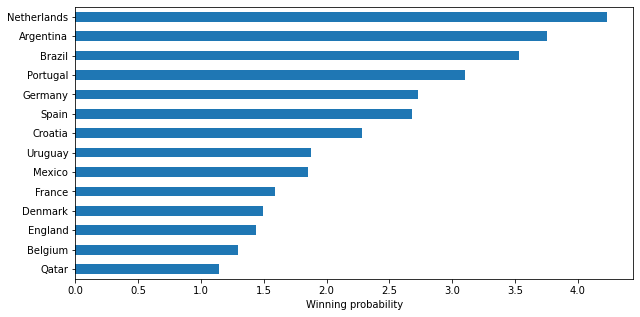

In [223]:
pd.Series(total_simulation).value_counts().sort_values().divide(n_simulations).plot.barh(figsize=(10,5))
plt.xlabel('Winning probability')